<a href="https://colab.research.google.com/github/YunSeoHwan/My-own-study-repository/blob/main/ML_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [3]:
import pandas as pd
import numpy as np
import random
import collections
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
import matplotlib.font_manager as fm

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from scipy import stats

random.seed(2023)

import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline

In [2]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz

# Data Load

In [48]:
data = pd.read_csv('/content/drive/MyDrive/ML/data.csv')

In [ ]:
data.head(5)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [113]:
# 데이터 중복
dup_data = data[data.duplicated()]
print(dup_data.shape)

(0, 17)


In [49]:
# 중복 제거
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2082  Female  20.976842  1.710730  131.408528                            yes   
2083  Female  21.982942  1.748584  133.742943                            yes   
2084  Female  22.524036  1.752206  133.689352                            yes   
2085  Female  24.361936  1.739450  133.346641                            yes   
2086  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2082  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2083  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2084  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2085  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2086  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2082   Sometimes  Public_Transportation     Obesity_Type_III  
2083   Sometimes  Public_Transportation     Obesity_Type_III  
2084   Sometimes  Public_Transportation     Obesity_Type_III  
2085   Sometimes  Public_Transportation     Obesity_Type_III  
2086   Sometimes  Public_Transportation     Obesity_Type_III  

[2087 rows x 17 columns]

In [ ]:
# numerical data
data.describe()

Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       2.000000     1.000000     0.630866  
75%       2.466193     1.678102     1.000000  
max       3.000000     3.000000     2.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [114]:
# 결측지 확인
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Data Processing

In [18]:
# 범주형 변수 표시
cat_col = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for cat in cat_col:
  print(cat)
  print(data[cat].unique())
  print("\n")

Gender
['Female' 'Male']


family_history_with_overweight
['yes' 'no']


FAVC
['no' 'yes']


CAEC
['Sometimes' 'Frequently' 'Always' 'no']


SMOKE
['no' 'yes']


SCC
['no' 'yes']


CALC
['no' 'Sometimes' 'Frequently' 'Always']


MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




In [50]:
data['CAEC'] = data['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['SMOKE'] = data['SMOKE'].apply(lambda x: ['no', 'yes'].index(x))
data['SCC'] = data['SCC'].apply(lambda x: ['no', 'yes'].index(x))
data['CALC'] = data['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female': 1})
data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'no' : 0, 'yes': 1})
data['FAVC'] = data['FAVC'].map({'no' : 0, 'yes': 1})
data['MTRANS'] = data['MTRANS'].map({'Public_Transportation': 1, 'Walking':2, 'Automobile':3, 'Motorbike':4, 'Bike':5})
data.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62    64.0                               1     0   2.0   
1       1  21.0    1.52    56.0                               1     0   3.0   
2       0  23.0    1.80    77.0                               1     0   2.0   
3       0  27.0    1.80    87.0                               0     0   3.0   
4       0  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0  3.0     1      0   2.0    0  0.0  1.0     0       1        Normal_Weight  
1  3.0     1      1   3.0    1  3.0  0.0     1       1        Normal_Weight  
2  3.0     1      0   2.0    0  2.0  1.0     2       1        Normal_Weight  
3  3.0     1      0   2.0    0  2.0  0.0     2       2   Overweight_Level_I  
4  1.0     1      0   2.0    0  0.0  0.0     1       1  Overweight_Level_II

In [51]:
# 비만도 4개로 줄이기
data['NObeyesdad'] = data['NObeyesdad'].map({'Insufficient_Weight' : 0, 'Normal_Weight' : 1, 'Overweight_Level_I' : 2, 'Overweight_Level_II' : 2,
                                             'Obesity_Type_I' : 3, 'Obesity_Type_II' : 3, 'Obesity_Type_III' : 3})
data.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62    64.0                               1     0   2.0   
1       1  21.0    1.52    56.0                               1     0   3.0   
2       0  23.0    1.80    77.0                               1     0   2.0   
3       0  27.0    1.80    87.0                               0     0   3.0   
4       0  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     1      0   2.0    0  0.0  1.0     0       1           1  
1  3.0     1      1   3.0    1  3.0  0.0     1       1           1  
2  3.0     1      0   2.0    0  2.0  1.0     2       1           1  
3  3.0     1      0   2.0    0  2.0  0.0     2       2           2  
4  1.0     1      0   2.0    0  0.0  0.0     1       1           2

In [52]:
# label split
data_label = data['NObeyesdad']
data_label.name = 'Class'  # Class라는 이름으로 저장
data = data.drop('NObeyesdad', axis=1)

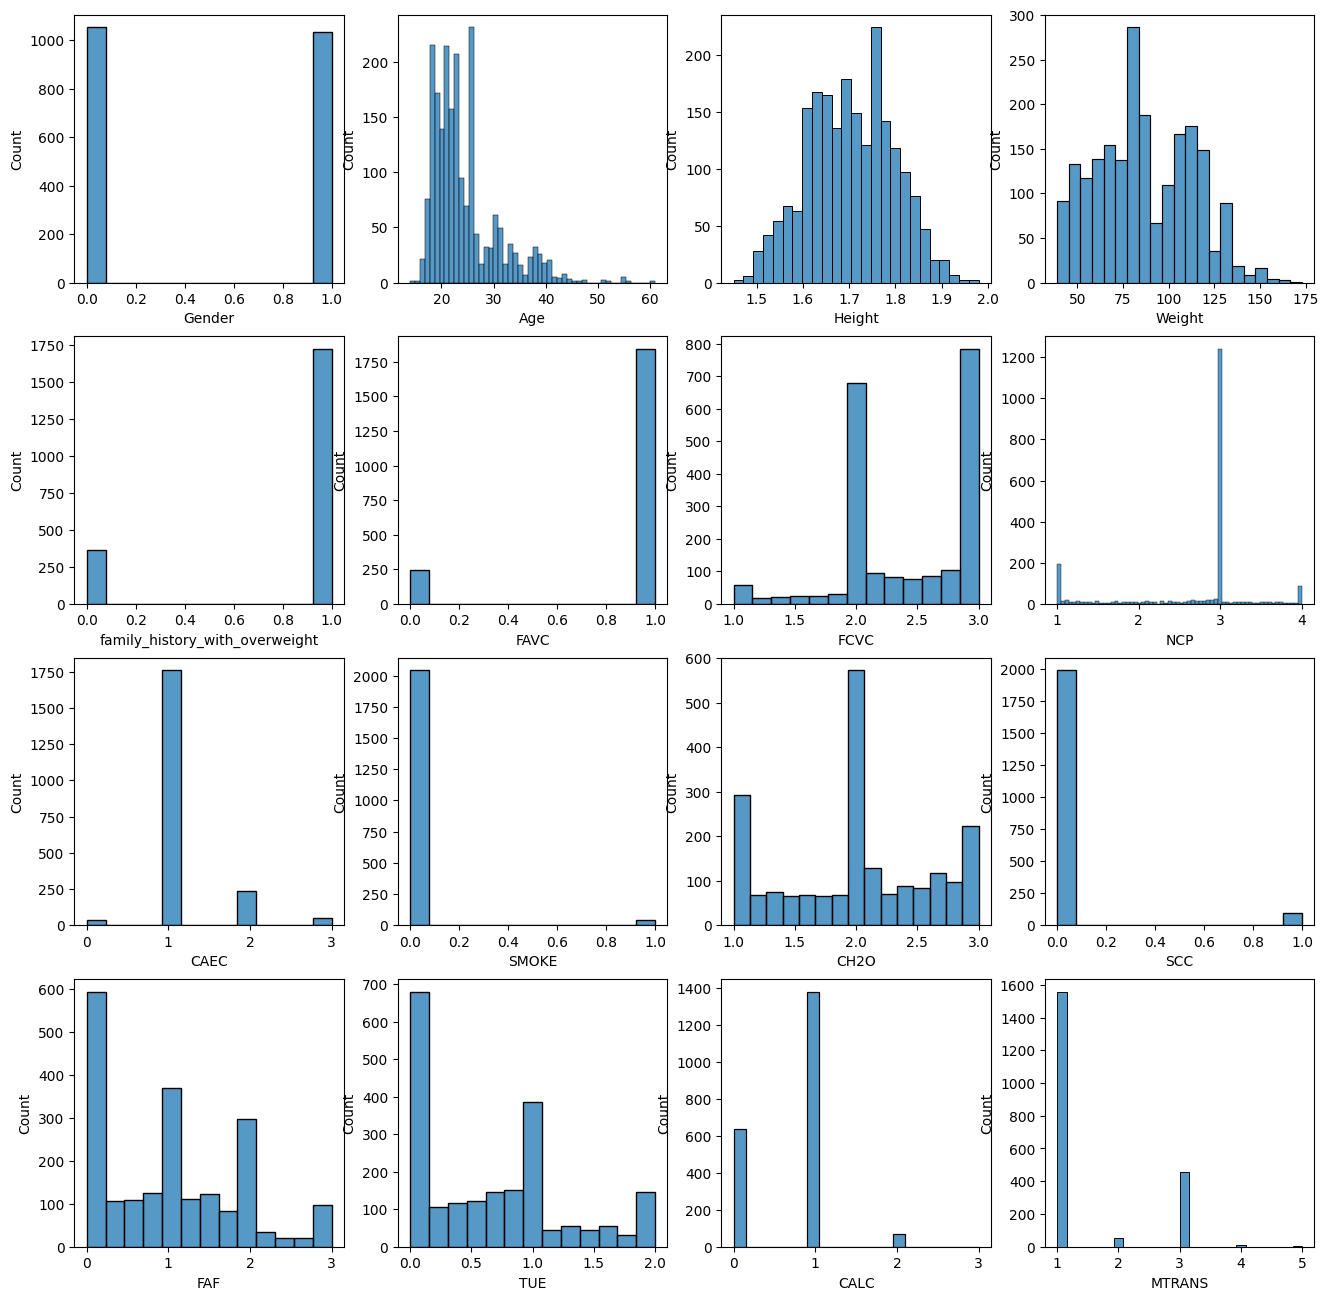

In [118]:
# 데이터 분포
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

fig, axs = plt.subplots(num_rows, 4, figsize=(16, 4 * num_rows))

for i, col in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4
    
    sns.histplot(data=data, x=col, ax=axs[row_idx, col_idx])


In [23]:
for col in data.columns:
    print(col + " : " + str(data[col].nunique()))

Gender : 2
Age : 1402
Height : 1574
Weight : 1525
family_history_with_overweight : 2
FAVC : 2
FCVC : 810
NCP : 635
CAEC : 4
SMOKE : 2
CH2O : 1268
SCC : 2
FAF : 1190
TUE : 1129
CALC : 4
MTRANS : 5


In [50]:
# unique variable counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Before")
    else:
        print("After")

    for col in columns:    
        print("Variable:", col, "| Count Unique:",data[col].nunique(),"| Min: ", data[col].min(), "| Max: ",data[col].max())

In [51]:
# Convert float variables to integer to the nearest inter
columns = ["Age", "FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    data[col] = round(data[col]).astype('int')  
    
# post conversion counts
print("")
variable_counts(columns, 'post')

Before
Variable: Age | Count Unique: 1402 | Min:  14.0 | Max:  61.0
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

After
Variable: Age | Count Unique: 40 | Min:  14 | Max:  61
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


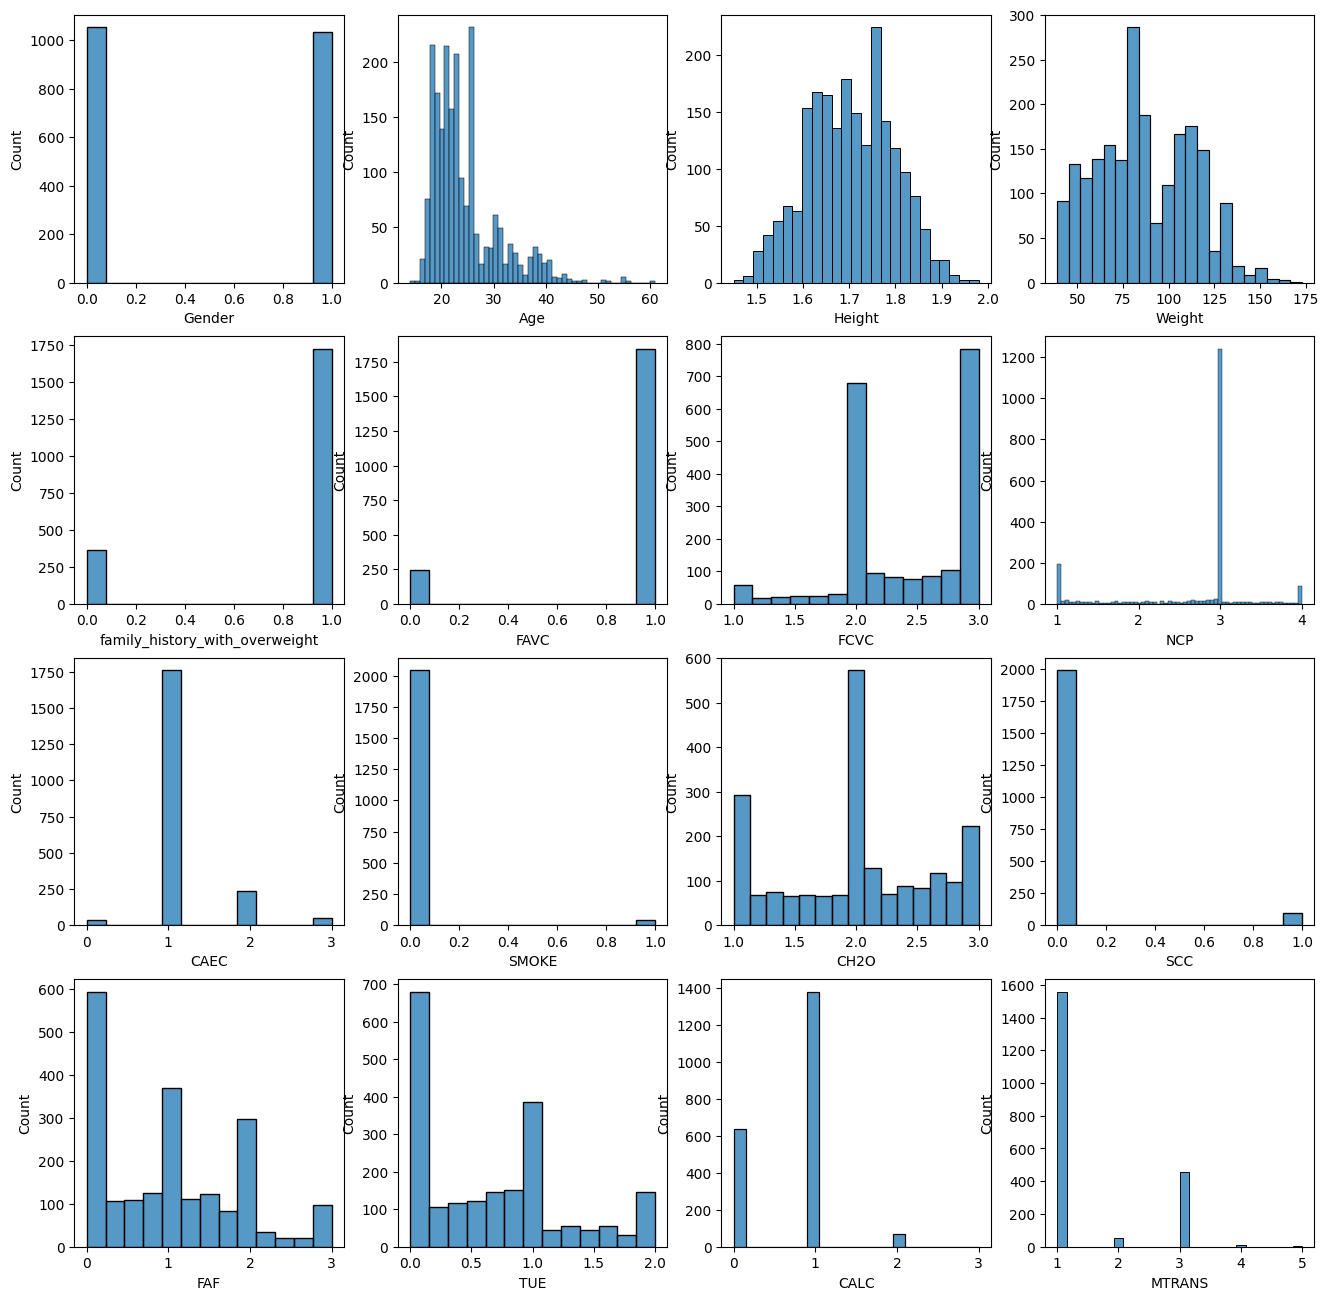

In [237]:
# 데이터 분포
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

fig, axs = plt.subplots(num_rows, 4, figsize=(16, 4 * num_rows))

for i, col in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4
    
    sns.histplot(data=data, x=col, ax=axs[row_idx, col_idx])


# 이상치 제거

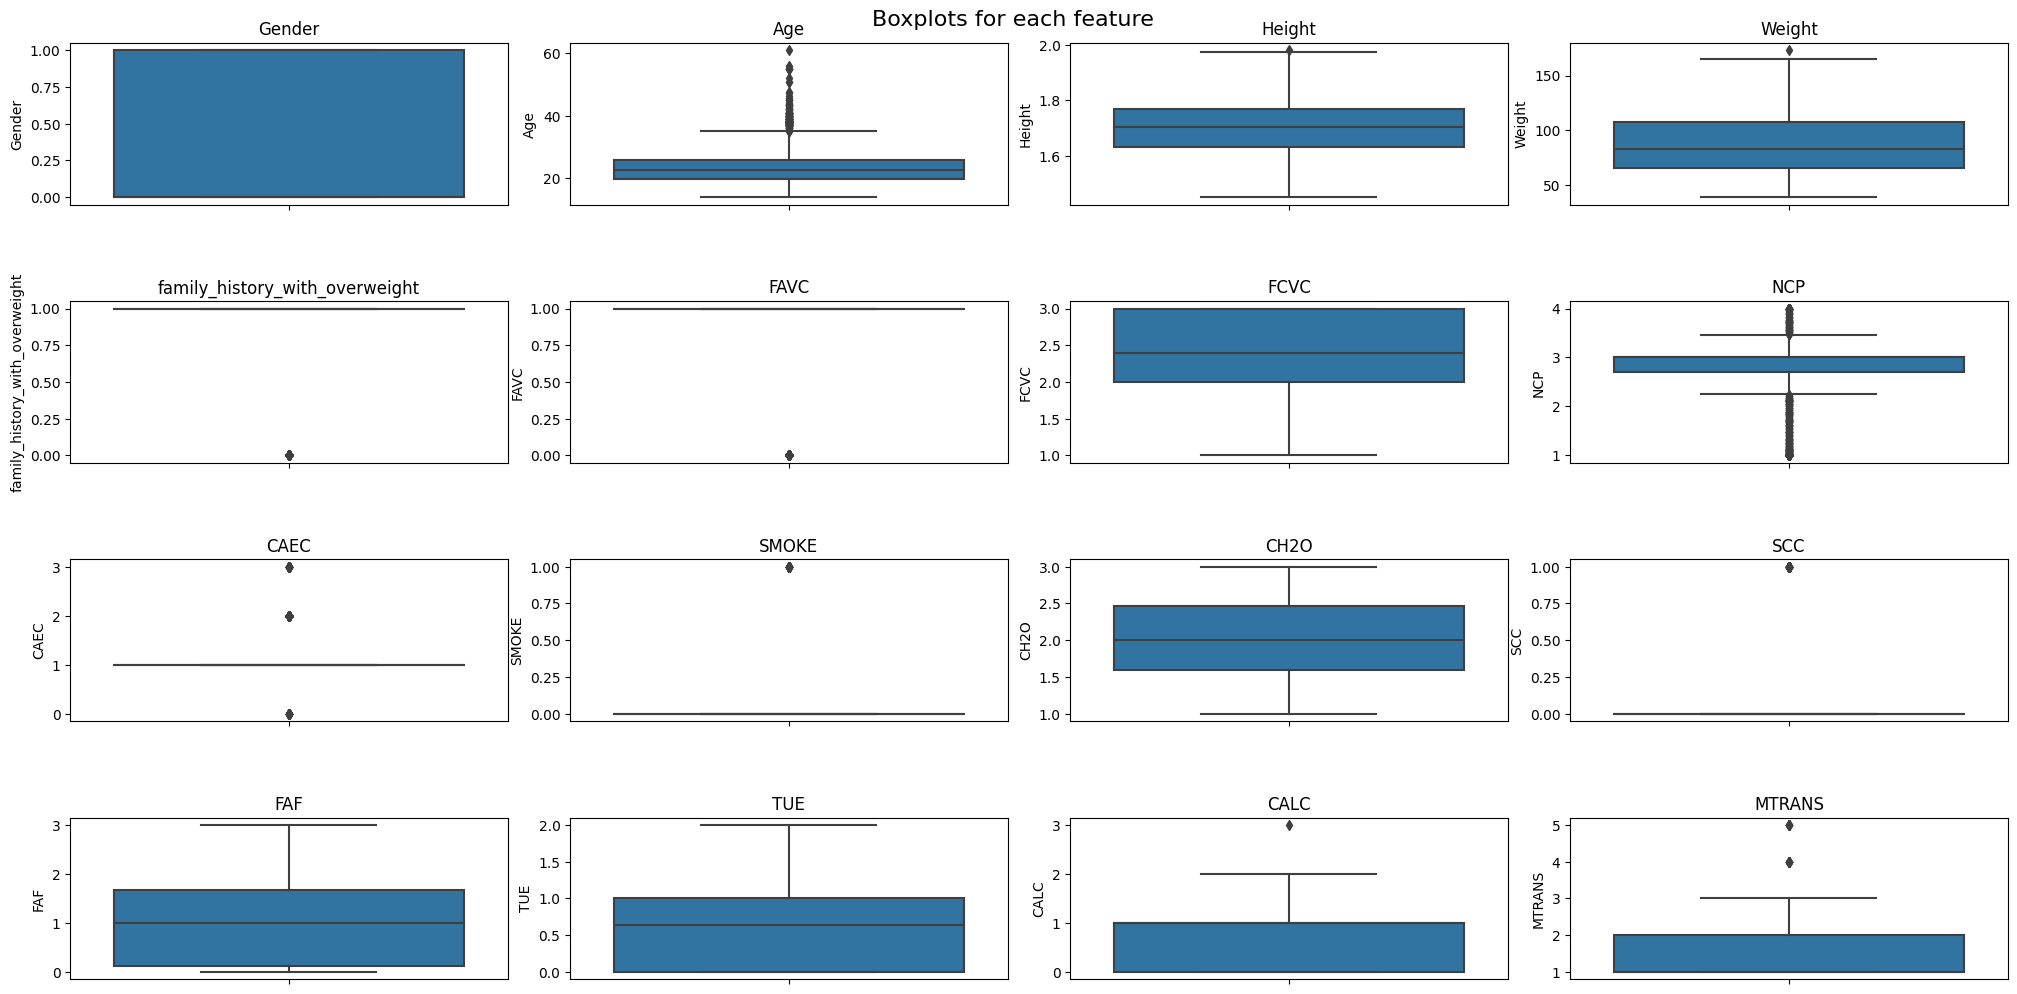

In [236]:
# 모든 컬럼에 대해 이상치 시각화
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    axs[index].set_title(k, fontsize=12)
    index += 1
fig.suptitle("Boxplots for each feature", fontsize=16)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [220]:
def tukeys_fences(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    return (lower_fence, upper_fence)

# Tukey's fences를 사용하여 이상치 제거
for column in data.columns:
    if column != 'NObeyesdad':
        lower_fence, upper_fence = tukeys_fences(data[column])
        data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)]


In [221]:
data

Gender        Age    Height      Weight  family_history_with_overweight  \
24         0  21.000000  1.850000   68.000000                               1   
38         0  23.000000  1.650000   67.000000                               1   
39         1  21.000000  1.750000   88.000000                               1   
40         1  21.000000  1.670000   75.000000                               1   
60         1  21.000000  1.550000   49.000000                               1   
...      ...        ...       ...         ...                             ...   
2082       1  20.976842  1.710730  131.408528                               1   
2083       1  21.982942  1.748584  133.742943                               1   
2084       1  22.524036  1.752206  133.689352                               1   
2085       1  24.361936  1.739450  133.346641                               1   
2086       1  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
24       1   2.0  3.0     1      0  2.000000    0  0.000000  1.000000     1   
38       1   2.0  3.0     1      0  2.000000    0  1.000000  1.000000     1   
39       1   2.0  3.0     1      0  3.000000    0  3.000000  0.000000     1   
40       1   2.0  3.0     1      0  2.000000    0  1.000000  0.000000     1   
60       1   2.0  3.0     1      0  3.000000    0  3.000000  1.000000     1   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2082     1   3.0  3.0     1      0  1.728139    0  1.676269  0.906247     1   
2083     1   3.0  3.0     1      0  2.005130    0  1.341390  0.599270     1   
2084     1   3.0  3.0     1      0  2.054193    0  1.414209  0.646288     1   
2085     1   3.0  3.0     1      0  2.852339    0  1.139107  0.586035     1   
2086     1   3.0  3.0     1      0  2.863513    0  1.026452  0.714137     1   

      MTRANS  
24         1  
38         1  
39         1  
40         1  
60         1  
...      ...  
2082       1  
2083       1  
2084       1  
2085       1  
2086       1  

[627 rows x 16 columns]

# Processing

# 정규화

In [ ]:
data

{'sdscaled_data':              X         Y  Class
 0     1.986063 -0.001867    1.0
 1     2.572082 -0.914744    1.0
 2    -0.534935 -1.759923    1.0
 3    -0.074892 -0.598660    2.0
 4     1.028934 -0.108693    2.0
 ...        ...       ...    ...
 2106       NaN       NaN    3.0
 2107       NaN       NaN    3.0
 2108       NaN       NaN    3.0
 2109       NaN       NaN    3.0
 2110       NaN       NaN    3.0
 
 [2111 rows x 3 columns],
 'mMscaled_data':              X         Y  Class
 0     0.569948  0.086939    1.0
 1     0.575638  0.228813    1.0
 2    -0.503133  0.410184    1.0
 3    -0.219715  1.071126    2.0
 4    -0.134455  1.048636    2.0
 ...        ...       ...    ...
 2106       NaN       NaN    3.0
 2107       NaN       NaN    3.0
 2108       NaN       NaN    3.0
 2109       NaN       NaN    3.0
 2110       NaN       NaN    3.0
 
 [2111 rows x 3 columns],
 'robust_data':              X         Y  Class
 0    -0.890467 -0.851438    1.0
 1    -0.944041 -0.825004    1.0
 2  

<Axes: title={'center': 'Correlation of Features'}>

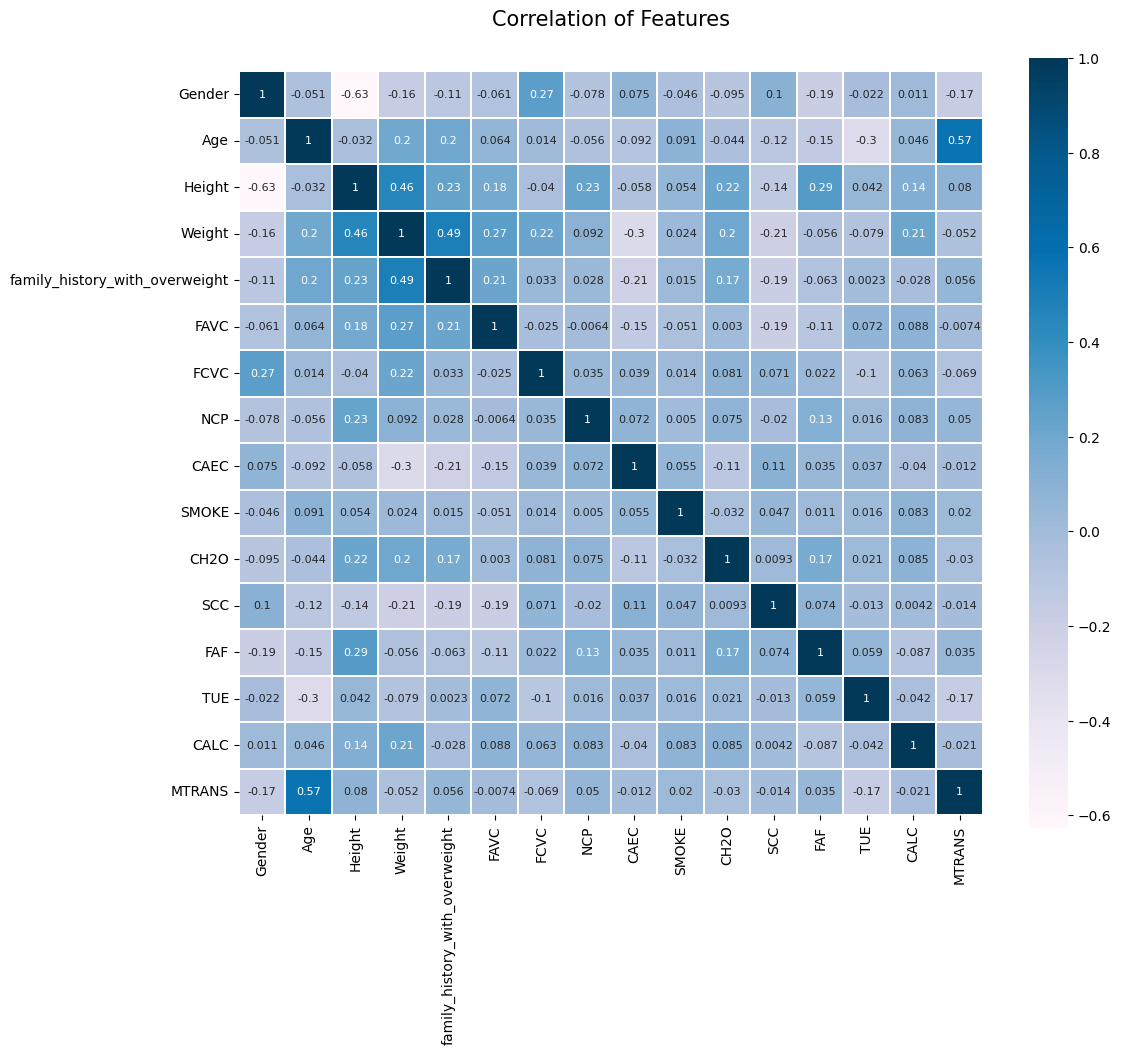

In [238]:
# 상관관계 분석
colormap = plt.cm.PuBu
plt.figure(figsize=(12, 10))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})

# 몸무게와 관련있는 것 적기
# 

In [53]:
# Standard Scaling
sdscaler = StandardScaler()
sdscaler.fit(data)

# 데이터 변환
sdscaled_data = sdscaler.transform(data)

# 데이터 프레임으로 저장
sdscaled_data = pd.DataFrame(sdscaled_data)

In [ ]:
sdscaled_data.describe()

0             1             2             3             4   \
count  2.087000e+03  2.087000e+03  2.087000e+03  2.087000e+03  2.087000e+03   
mean  -5.106920e-17 -1.634214e-16  8.851994e-16 -5.447381e-17 -1.089476e-16   
std    1.000240e+00  1.000240e+00  1.000240e+00  1.000240e+00  1.000240e+00   
min   -9.918872e-01 -1.625984e+00 -2.712155e+00 -1.827745e+00 -2.172052e+00   
25%   -9.918872e-01 -6.968683e-01 -7.781538e-01 -7.966038e-01  4.603942e-01   
50%   -9.918872e-01 -2.364389e-01 -1.170116e-02 -1.435055e-01  4.603942e-01   
75%    1.008179e+00  2.586523e-01  7.172047e-01  8.080017e-01  4.603942e-01   
max    1.008179e+00  5.755509e+00  2.976762e+00  3.289772e+00  4.603942e-01   

                 5             6             7            8             9   \
count  2.087000e+03  2.087000e+03  2.087000e+03  2087.000000  2.087000e+03   
mean  -2.723690e-17 -5.447381e-16  1.736353e-16     0.000000 -1.429937e-16   
std    1.000240e+00  1.000240e+00  1.000240e+00     1.000240  1.000240e+00   
min   -2.754719e+00 -2.658892e+00 -2.225418e+00    -2.494958 -6.814090e+00   
25%    3.630134e-01 -7.883642e-01 -4.856048e-03    -0.318128  1.467547e-01   
50%    3.630134e-01 -4.713949e-02  3.909061e-01    -0.318128  1.467547e-01   
75%    3.630134e-01  1.082164e+00  3.909061e-01    -0.318128  1.467547e-01   
max    3.630134e-01  1.082164e+00  1.699068e+00     4.035532  1.467547e-01   

                 10            11            12            13            14  \
count  2.087000e+03  2.087000e+03  2.087000e+03  2.087000e+03  2.087000e+03   
mean   4.085536e-16 -1.906583e-16  2.587506e-16 -1.089476e-16  9.192455e-17   
std    1.000240e+00  1.000240e+00  1.000240e+00  1.000240e+00  1.000240e+00   
min   -1.652172e+00 -4.554073e+00 -1.186977e+00 -1.090505e+00 -1.411836e+00   
25%   -6.804829e-01  2.195836e-01 -1.041062e+00 -1.090505e+00 -1.411836e+00   
50%   -7.809793e-03  2.195836e-01 -1.501506e-02 -5.290961e-02  5.228335e-01   
75%    7.587794e-01  2.195836e-01  7.796945e-01  5.542111e-01  5.228335e-01   
max    1.636552e+00  2.195836e-01  2.328908e+00  2.198928e+00  4.392173e+00   

                 15  
count  2.087000e+03  
mean  -1.702307e-17  
std    1.000240e+00  
min   -5.654632e-01  
25%   -5.654632e-01  
50%   -5.654632e-01  
75%    5.825151e-01  
max    4.026450e+00

In [54]:
# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(data)

# 데이터 변환
mMscaled_data = mMscaler.transform(data)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(mMscaled_data)

In [ ]:
mMscaled_data.describe()

X             Y        Class
count  2.087000e+03  2.087000e+03  2087.000000
mean  -7.490149e-17  5.447381e-17     2.074748
std    5.384098e-01  4.208516e-01     1.052400
min   -7.580781e-01 -6.721436e-01     0.000000
25%   -5.434607e-01 -2.829550e-01     1.000000
50%   -1.307604e-01 -7.618794e-02     2.000000
75%    4.802474e-01  1.256173e-01     3.000000
max    1.063395e+00  1.294531e+00     3.000000

In [55]:
# RobustScaler 선언 및 Fitting
robust = RobustScaler()
robust.fit(data)

# 데이터 변환
robust_data = robust.transform(data)

# 데이터 프레임으로 저장
robust_data = pd.DataFrame(robust_data)

# PCA

In [56]:
# 12차원 PCA
pca = PCA(n_components=12)

mMscaled_data = pca.fit_transform(mMscaled_data)
sdscaled_data = pca.fit_transform(sdscaled_data)
robust_data = pca.fit_transform(robust_data)

mMscaled_data = pd.DataFrame(mMscaled_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f', 'aa', 'bb', 'cc', 'dd'])
mMscaled_data = pd.concat([mMscaled_data, data_label], axis=1)

sdscaled_data = pd.DataFrame(sdscaled_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f', 'aa', 'bb', 'cc', 'dd'])
sdscaled_data = pd.concat([sdscaled_data, data_label], axis=1)

robust_data = pd.DataFrame(robust_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f', 'aa', 'bb', 'cc', 'dd'])
robust_data = pd.concat([robust_data, data_label], axis=1)

print(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1])
print(sum(pca.explained_variance_ratio_))

0.5568825110210879 0.13278951440320175
0.9806337041193626


In [57]:
# 10차원 PCA
pca = PCA(n_components=10)

mMscaled_data = pca.fit_transform(mMscaled_data)
sdscaled_data = pca.fit_transform(sdscaled_data)
robust_data = pca.fit_transform(robust_data)

mMscaled_data = pd.DataFrame(mMscaled_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f', 'aa', 'bb'])
mMscaled_data = pd.concat([mMscaled_data, data_label], axis=1)

sdscaled_data = pd.DataFrame(sdscaled_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f', 'aa', 'bb'])
sdscaled_data = pd.concat([sdscaled_data, data_label], axis=1)

robust_data = pd.DataFrame(robust_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f', 'aa', 'bb'])
robust_data = pd.concat([robust_data, data_label], axis=1)

print(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1])
print(sum(pca.explained_variance_ratio_))

0.5178904523113884 0.1507592703474538
0.9739608778968725


In [58]:
# 8차원 PCA
pca = PCA(n_components=8)

mMscaled_data = pca.fit_transform(mMscaled_data)
sdscaled_data = pca.fit_transform(sdscaled_data)
robust_data = pca.fit_transform(robust_data)

mMscaled_data = pd.DataFrame(mMscaled_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f'])
mMscaled_data = pd.concat([mMscaled_data, data_label], axis=1)

sdscaled_data = pd.DataFrame(sdscaled_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f'])
sdscaled_data = pd.concat([sdscaled_data, data_label], axis=1)

robust_data = pd.DataFrame(robust_data, columns=['X', 'Y','a', 'b', 'c', 'd', 'e', 'f'])
robust_data = pd.concat([robust_data, data_label], axis=1)

print(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1])
print(sum(pca.explained_variance_ratio_))

0.4880444954246912 0.21233016358352735
0.9626456455883442


In [59]:
# 6차원 PCA
pca = PCA(n_components=6)

mMscaled_data = pca.fit_transform(mMscaled_data)
sdscaled_data = pca.fit_transform(sdscaled_data)
robust_data = pca.fit_transform(robust_data)

mMscaled_data = pd.DataFrame(mMscaled_data, columns=['X', 'Y','a', 'b', 'c', 'd'])
mMscaled_data = pd.concat([mMscaled_data, data_label], axis=1)

sdscaled_data = pd.DataFrame(sdscaled_data, columns=['X', 'Y','a', 'b', 'c', 'd'])
sdscaled_data = pd.concat([sdscaled_data, data_label], axis=1)

robust_data = pd.DataFrame(robust_data, columns=['X', 'Y','a', 'b', 'c', 'd'])
robust_data = pd.concat([robust_data, data_label], axis=1)

print(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1])
print(sum(pca.explained_variance_ratio_))

0.4678689716021818 0.27855549440223937
0.9568484752299543


In [60]:
# 4차원 PCA
pca = PCA(n_components=4)

mMscaled_data = pca.fit_transform(mMscaled_data)
sdscaled_data = pca.fit_transform(sdscaled_data)
robust_data = pca.fit_transform(robust_data)

mMscaled_data = pd.DataFrame(mMscaled_data, columns=['X', 'Y','a', 'b'])
mMscaled_data = pd.concat([mMscaled_data, data_label], axis=1)

sdscaled_data = pd.DataFrame(sdscaled_data, columns=['X', 'Y','a', 'b'])
sdscaled_data = pd.concat([sdscaled_data, data_label], axis=1)

robust_data = pd.DataFrame(robust_data, columns=['X', 'Y','a', 'b'])
robust_data = pd.concat([robust_data, data_label], axis=1)

print(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1])
print(sum(pca.explained_variance_ratio_))

0.45453207991711625 0.3412702125553237
0.9436477017579752


In [61]:
# 2차원 PCA
pca = PCA(n_components=2)

mMscaled_data = pca.fit_transform(mMscaled_data)
sdscaled_data = pca.fit_transform(sdscaled_data)
robust_data = pca.fit_transform(robust_data)

mMscaled_data = pd.DataFrame(mMscaled_data, columns=['X', 'Y'])
mMscaled_data = pd.concat([mMscaled_data, data_label], axis=1)

sdscaled_data = pd.DataFrame(sdscaled_data, columns=['X', 'Y'])
sdscaled_data = pd.concat([sdscaled_data, data_label], axis=1)

robust_data = pd.DataFrame(robust_data, columns=['X', 'Y'])
robust_data = pd.concat([robust_data, data_label], axis=1)

print(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1])
print(sum(pca.explained_variance_ratio_))

0.4575120305257274 0.39695815337673795
0.8544701839024653


In [268]:
for i in range(10):
    # 2차원 PCA
    pca = PCA(n_components=(16/2))

    mMscaled_data = pca.fit_transform(mMscaled_data)
    sdscaled_data = pca.fit_transform(sdscaled_data)
    robust_data = pca.fit_transform(robust_data)

    mMscaled_data = pd.DataFrame(mMscaled_data, columns=['X', 'Y'])
    mMscaled_data = pd.concat([mMscaled_data, data_label], axis=1)

    sdscaled_data = pd.DataFrame(sdscaled_data, columns=['X', 'Y'])
    sdscaled_data = pd.concat([sdscaled_data, data_label], axis=1)

    robust_data = pd.DataFrame(robust_data, columns=['X', 'Y'])
    robust_data = pd.concat([robust_data, data_label], axis=1)

    print(f"{i+1}번째 PCA")
    print(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1])
    print(sum(pca.explained_variance_ratio_))

1번째 PCA
0.5568825110210881 0.13278951440123127
0.6896720254223194
2번째 PCA
0.7097190831575737 0.19415340113788462
0.9038724842954583
3번째 PCA
0.6929410894077721 0.25558183393236994
0.948522923340142
4번째 PCA
0.6508629762394181 0.3252766480121946
0.9761396242516127
5번째 PCA
0.6014214765645605 0.3865283838223648
0.9879498603869252
6번째 PCA
0.5582093339946249 0.4350036287525102
0.9932129627471351
7번째 PCA
0.5354551488394016 0.46037082030780296
0.9958259691472046
8번째 PCA
0.5495231370289945 0.4477317870948522
0.9972549241238466
9번째 PCA
0.5767296965380764 0.42136939235267223
0.9980990888907486
10번째 PCA
0.60354064090817 0.39508853373920644
0.9986291746473763


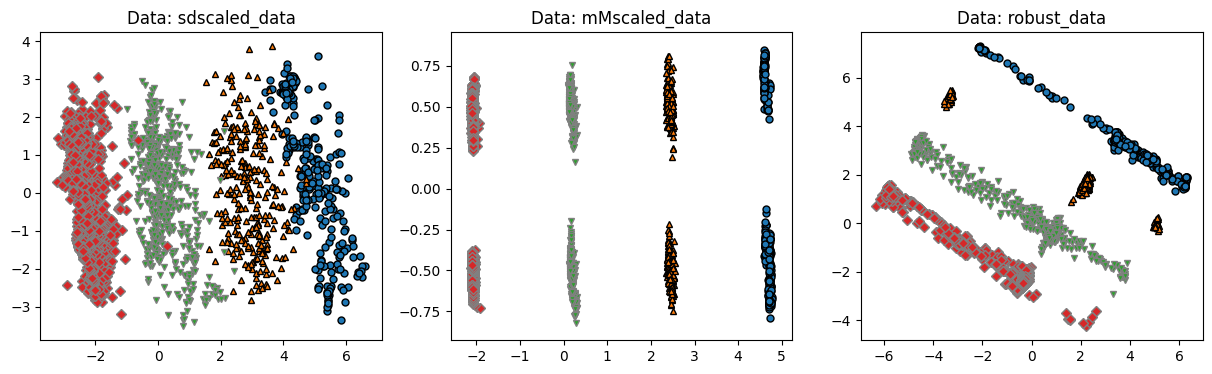

In [62]:
# 가상의 데이터셋 3가지 그래프
data = {'sdscaled_data':sdscaled_data,  'mMscaled_data': mMscaled_data, 'robust_data': robust_data}
fig, axes = plt.subplots(1,3,figsize=(15,4))
for i in range(3):
    Data = data[list(data.keys())[i]]
    mglearn.discrete_scatter(Data['X'], Data['Y'], Data['Class'], ax=axes[i], s=5)
    axes[i].set_title("Data: " + list(data.keys())[i])

In [256]:
pca.explained_variance_

array([6.58138609, 5.12877103])

In [63]:
sum(pca.explained_variance_ratio_)

0.8544701839024653

# K-means

In [64]:
# 산점도 가시화
def Simple_Scatter(i, Name):
    Data = data[list(data.keys())[i]]
    G = sns.jointplot(x = 'X', y = 'Y', data = Data, kind='scatter', hue = "Class")
    G.fig.suptitle("Data : " + Name, fontsize = 20, color = 'black', alpha = 0.9)

In [65]:
# K-Means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, NAME, Init_Method='k-means++', Num_Init=10):
    Data2 = Data[['X', 'Y']]
    fig, axes = plt.subplots(1, (np.max(list(Select_k)) - np.min(list(Select_k))) + 1, figsize=(15, 4))
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2023, n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], Kmeans_Clustering.labels_, ax=axes[i - 2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0],
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)),
                                 markeredgewidth=3,
                                 ax=axes[i - 2], s=10)
        Score = np.round(silhouette_score(Data2, Kmeans_Clustering.labels_), 3)
        sse = np.round(Kmeans_Clustering.inertia_, 3)  # SSE 계산
        axes[i - 2].set_title(NAME + ' / k = ' + str(i) + ' / S_Score:' + str(Score) + ' / SSE:' + str(sse), fontsize=8)
        axes[i - 2].tick_params(axis='both', which='major', labelsize=8)  # 눈금 레이블 크기 조절
    plt.tight_layout()

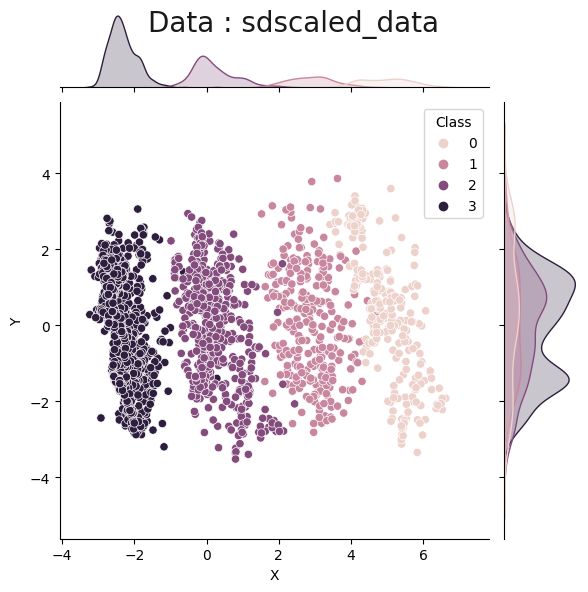

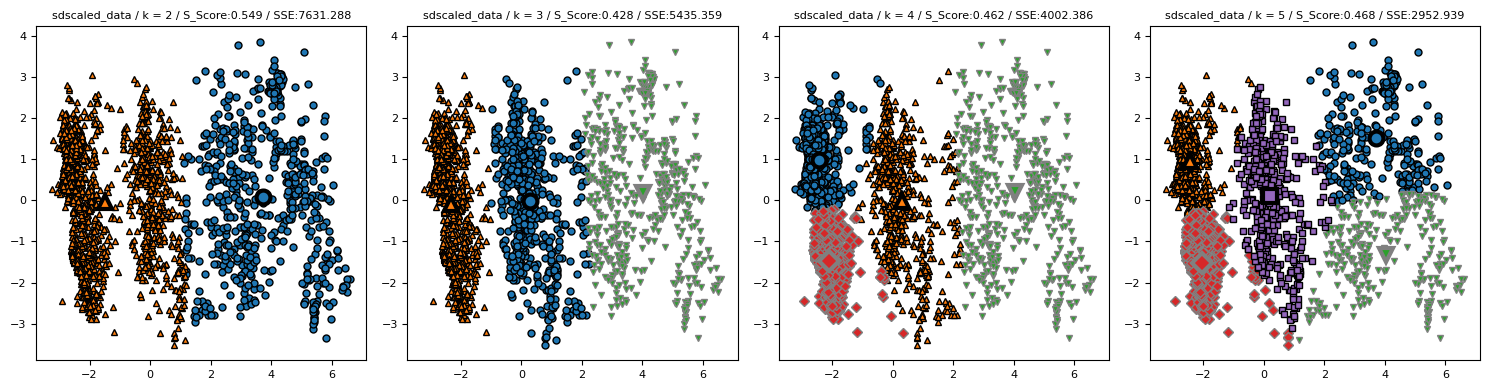

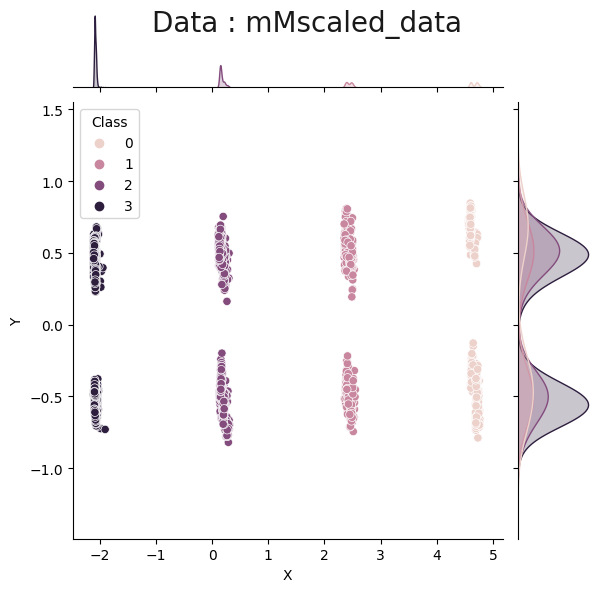

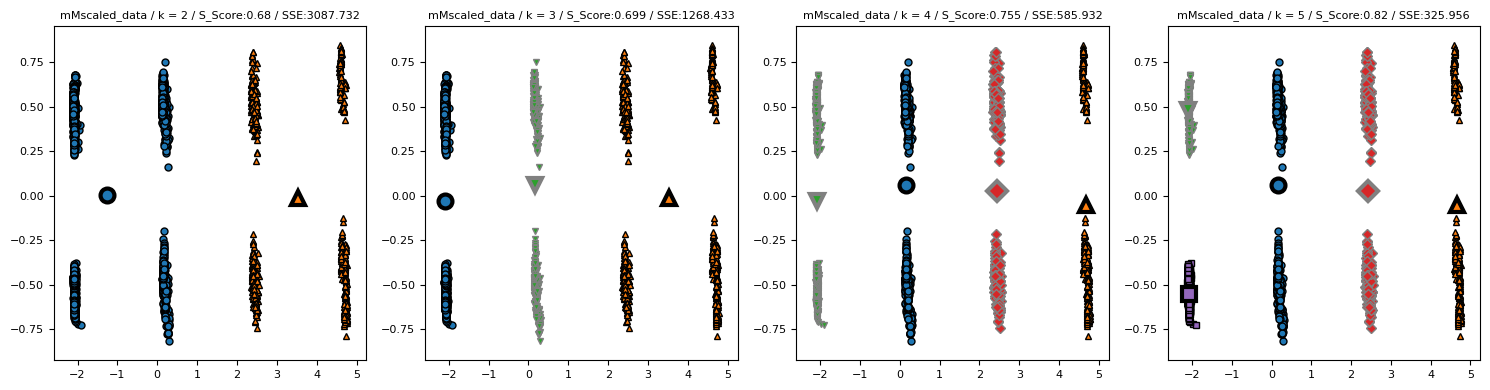

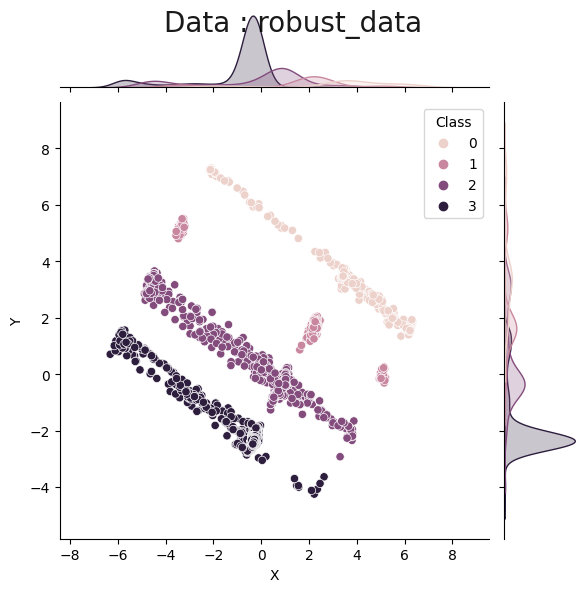

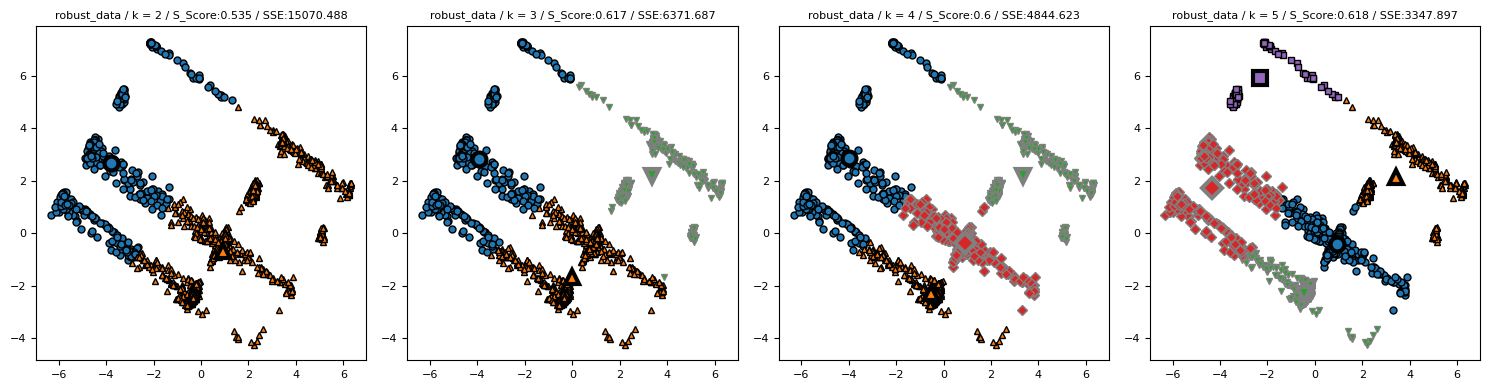

In [66]:
for i in range(0,3):
    Simple_Scatter(i, list(data.keys())[i])
    
    k_Means_Plot(Data = data[list(data.keys())[i]],
                 Select_k = range(2, 6),
                 NAME = list(data.keys())[i],
                 Init_Method='k-means++',Num_Init=10)

# 계층적 클러스터링

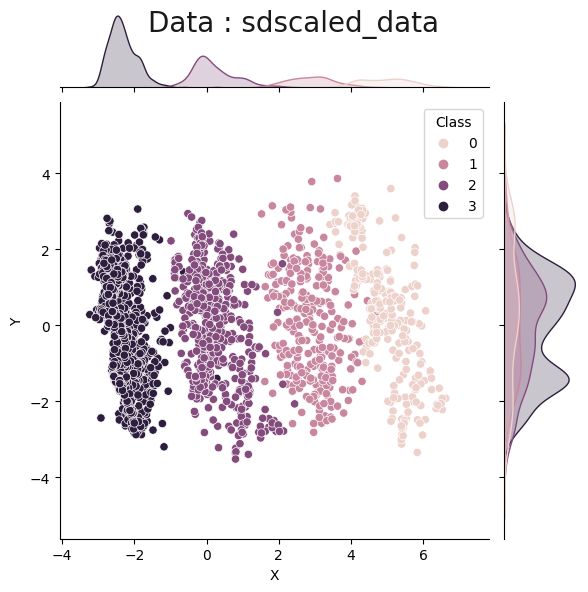

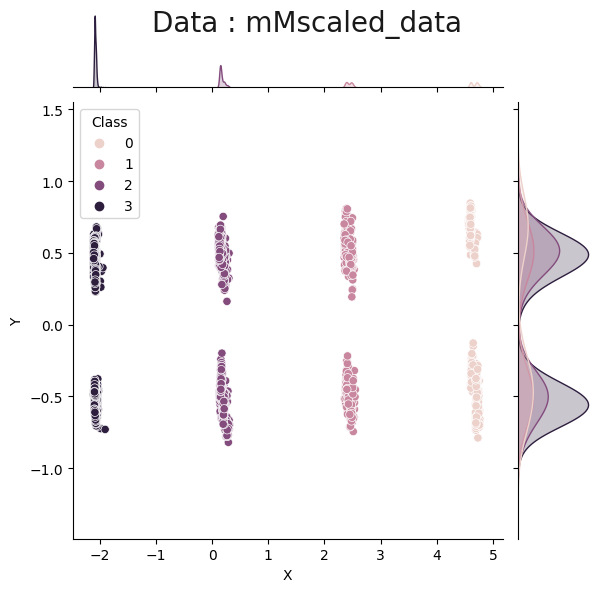

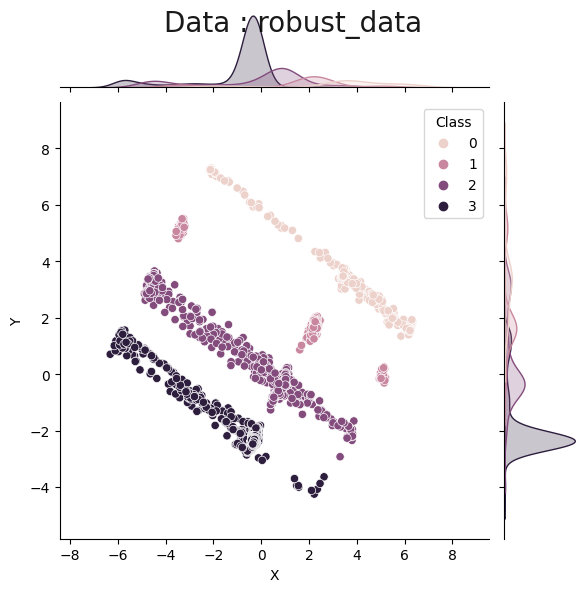

In [68]:
# Well seperated dataset
for i in range(3):
    Simple_Scatter(i, list(data.keys())[i])

def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )
    plt.show()

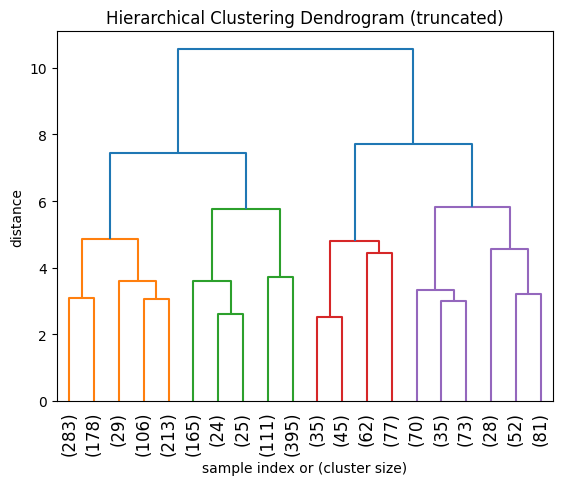

In [72]:
Fixed_Dendrogram(sdscaled_data[['X','Y']], 20, False)

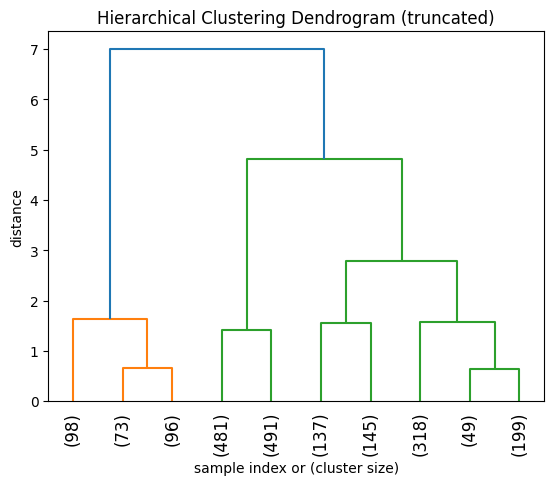

In [76]:
Fixed_Dendrogram(mMscaled_data[['X','Y']], 10, False)

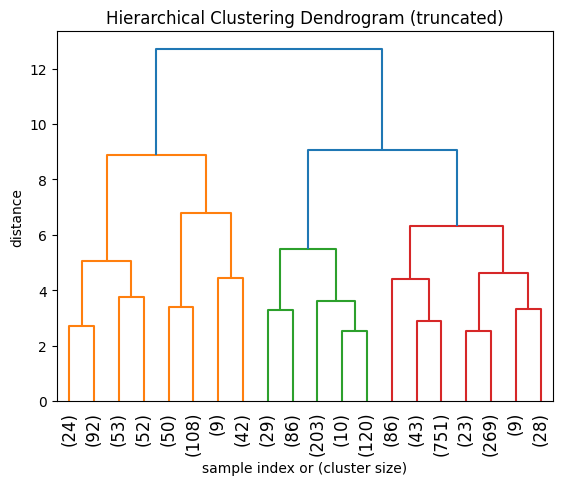

In [77]:
Fixed_Dendrogram(robust_data[['X','Y']], 20, False)

In [274]:
def Hclust_Plot(Data,Select_k,NAME):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels = H_Clustering.fit_predict(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" + NAME + ' / k = ' + str(i))
        Score=np.round(silhouette_score(Data2,P_Labels),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score), fontsize=8)

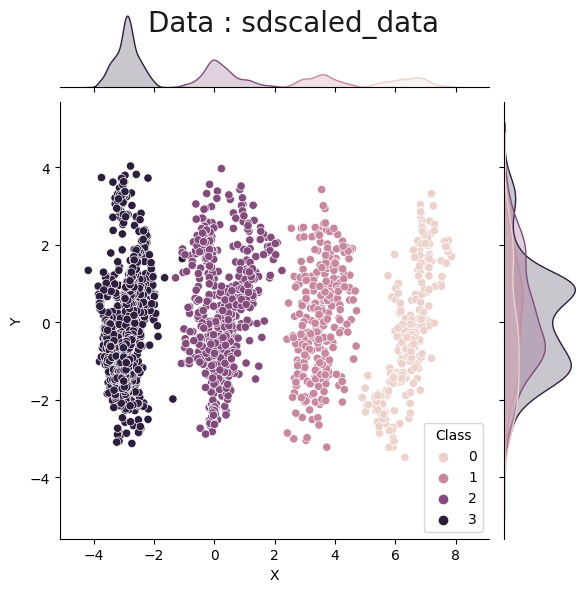

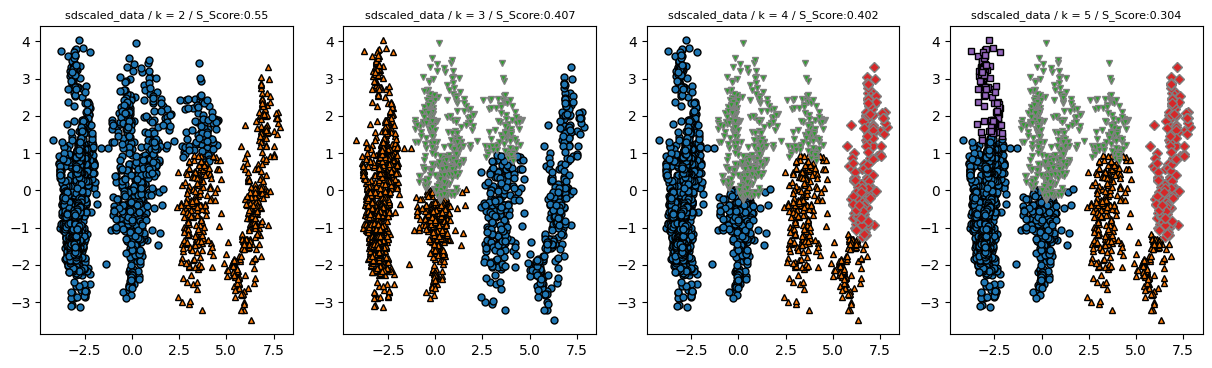

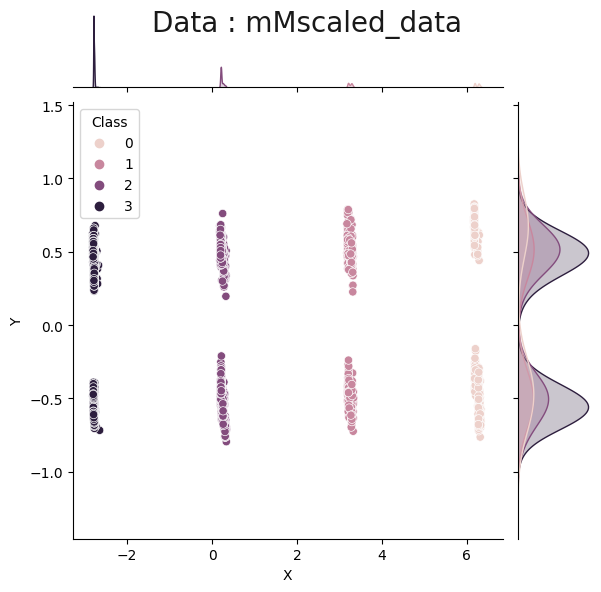

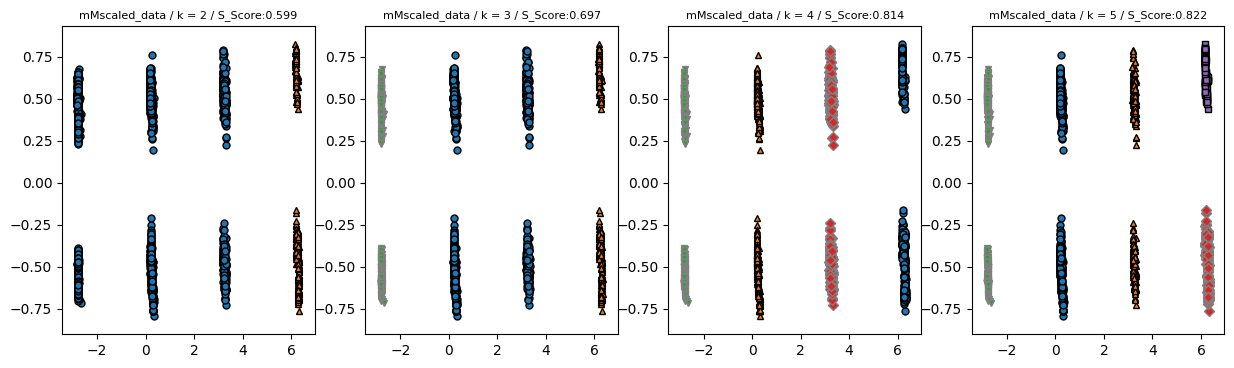

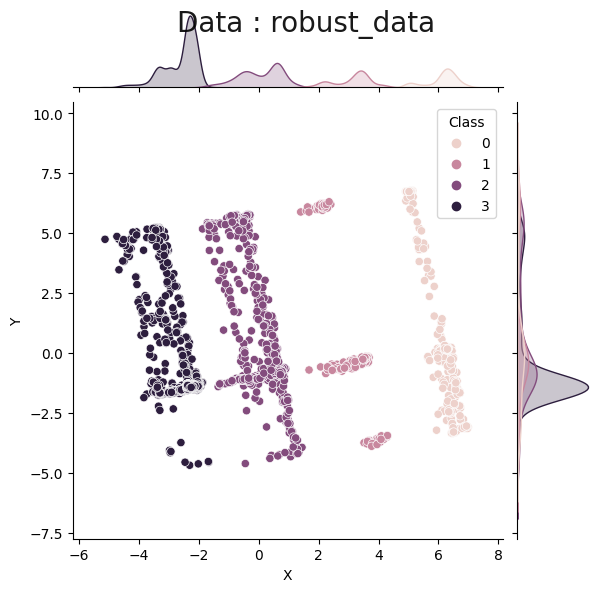

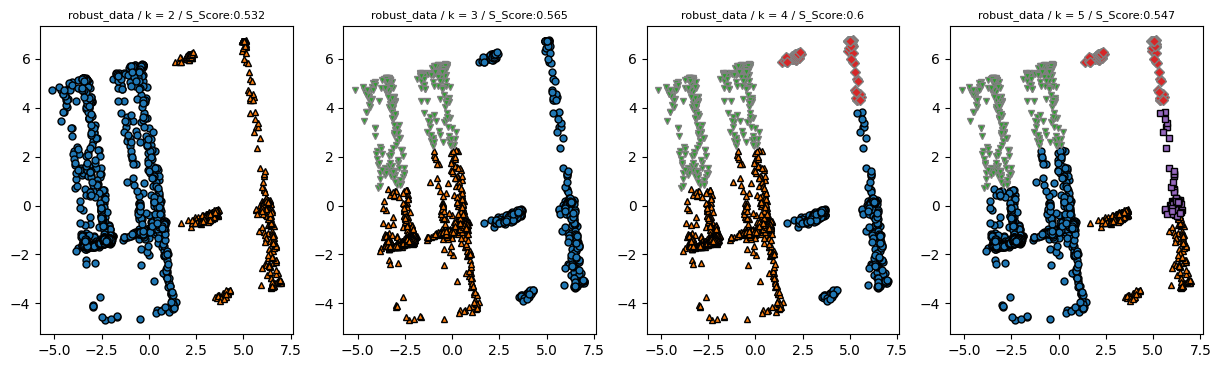

In [275]:
for i in range(0,3):
    Simple_Scatter(i, list(data.keys())[i])
    Hclust_Plot(data[list(data.keys())[i]],
                range(2, 6), list(data.keys())[i])

In [276]:
pca.explained_variance_ratio_

array([0.60354064, 0.39508853])

# DBSCAN

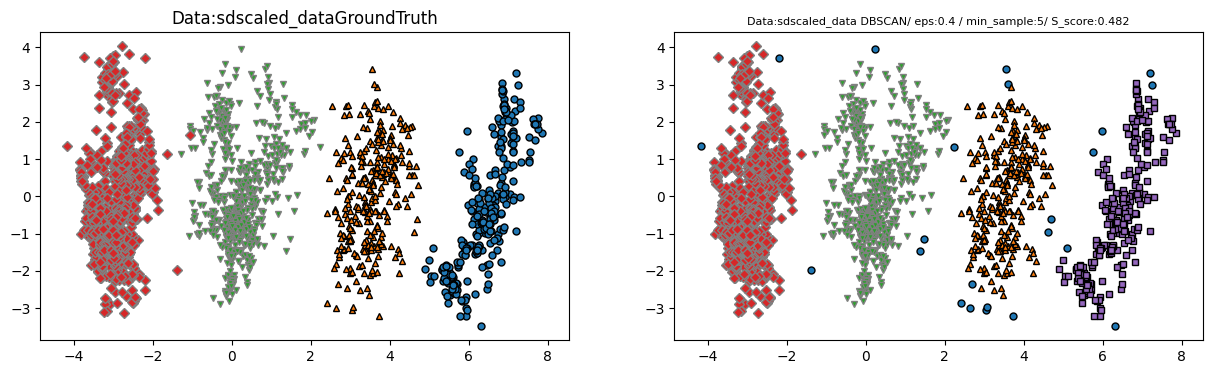

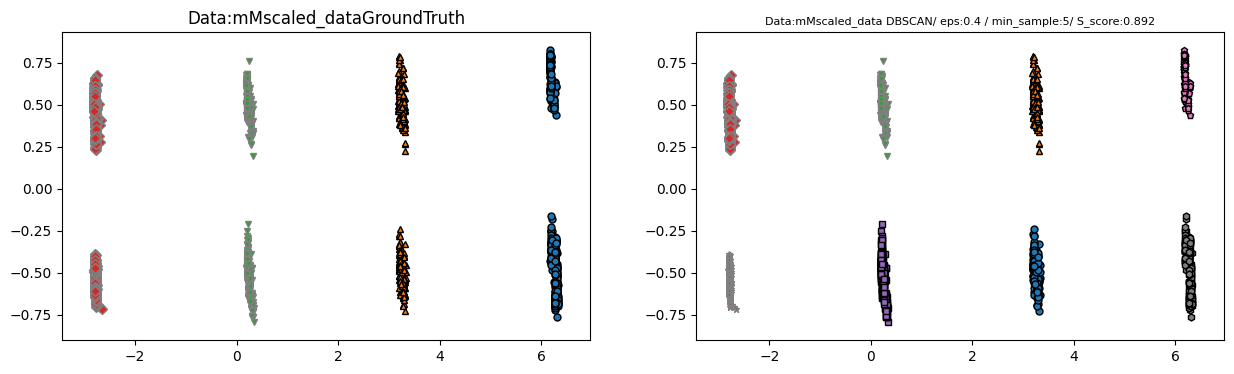

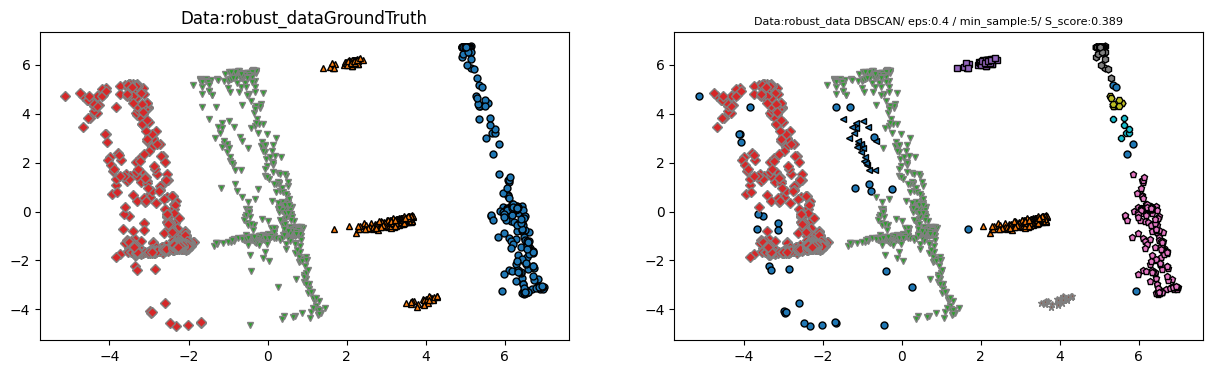

In [277]:
def DBSCAN_Plot(Data,NAME,min_samples=5,eps=0.4):
    
    Data2 = Data[['X', 'Y']]
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data2)
    Score=np.round(silhouette_score(Data2,Results),3)
    mglearn.discrete_scatter(Data2['X'], Data2['Y'], Data['Class'], ax=axes[0], s=5)
    axes[0].set_title("Data:" + NAME + 'GroundTruth')    
    mglearn.discrete_scatter(Data2['X'], Data2['Y'], Results, ax=axes[1], s=5)
    axes[1].set_title("Data:" + NAME + ' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score), fontsize=8)


DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data")
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data")
DBSCAN_Plot(Data=robust_data,NAME="robust_data")

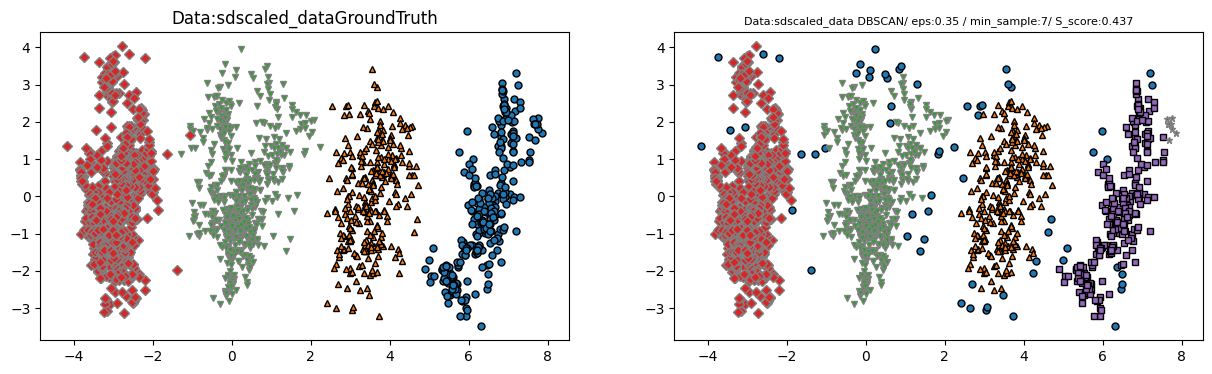

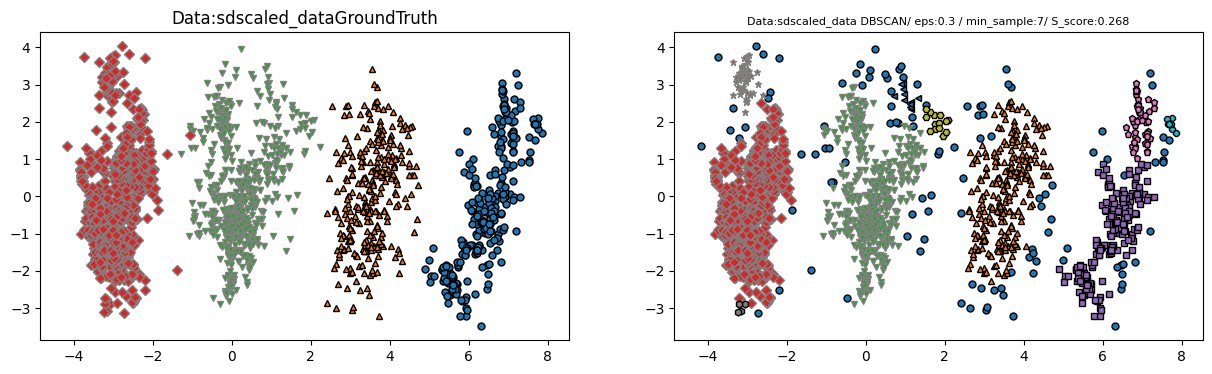

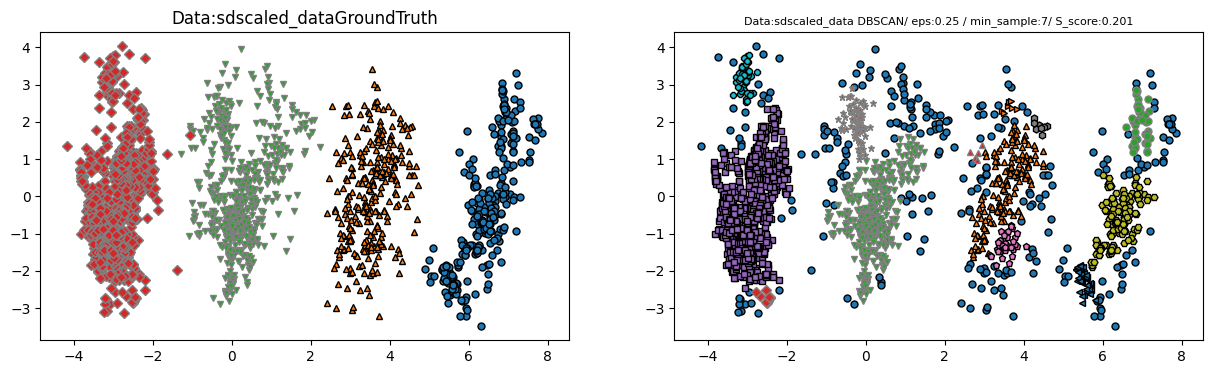

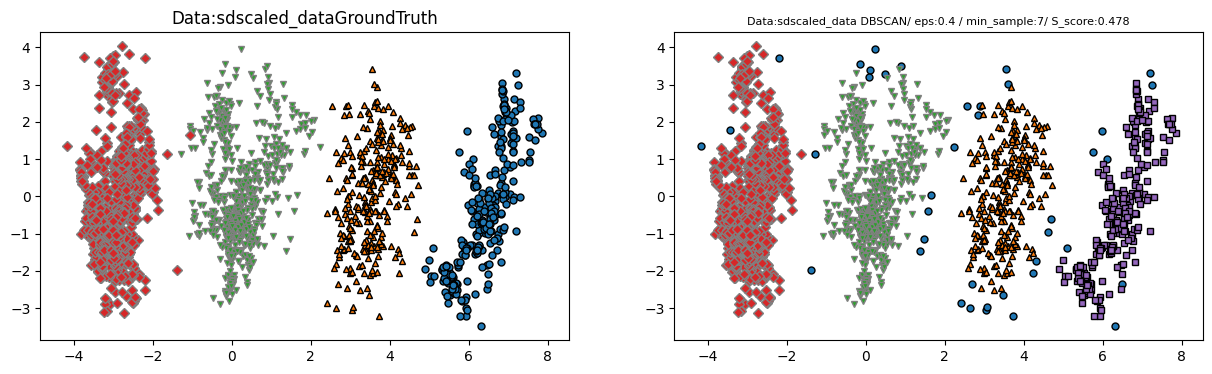

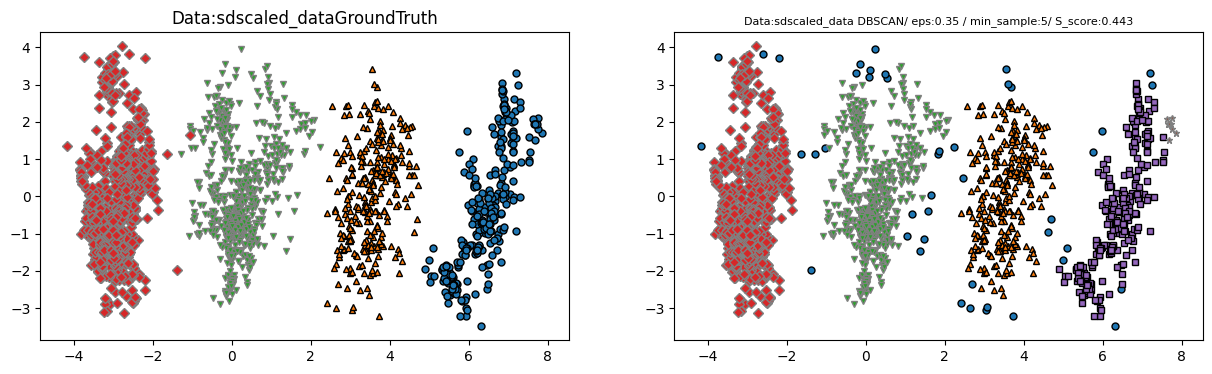

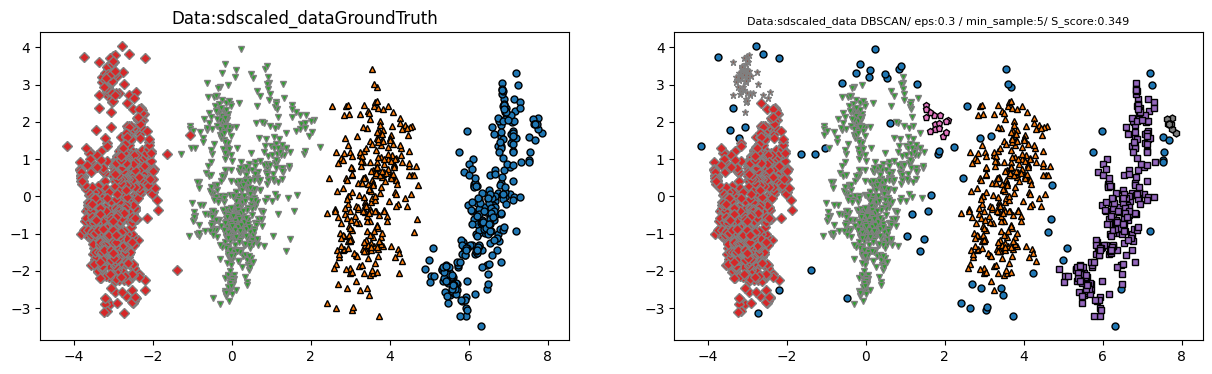

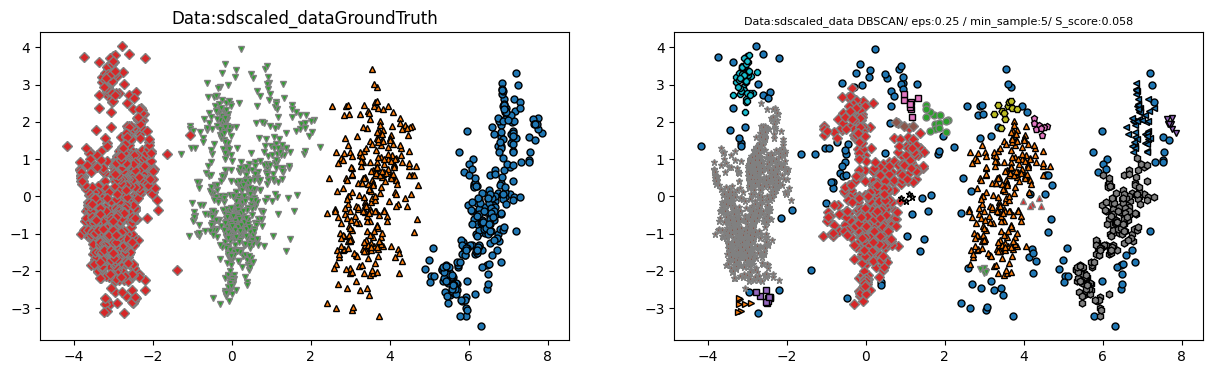

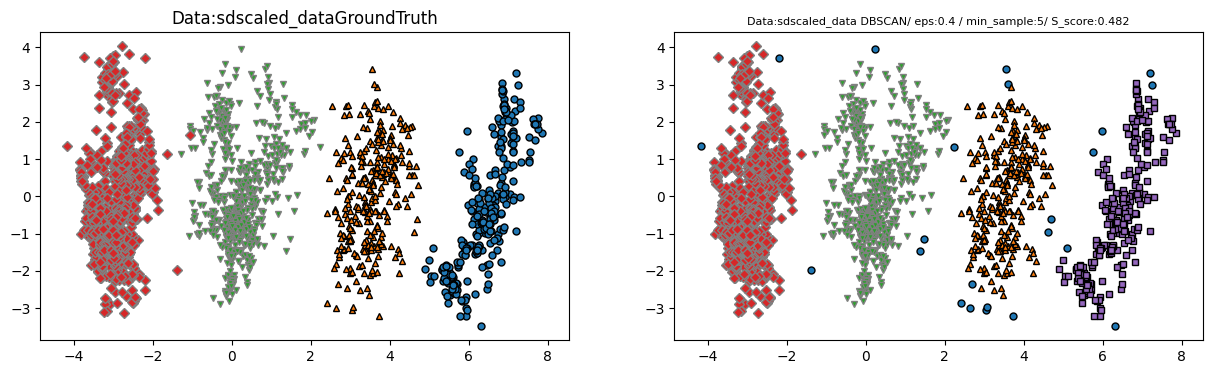

In [278]:
DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data",min_samples=7,eps=0.35)
DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data",min_samples=7,eps=0.30)
DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data",min_samples=7,eps=0.25)
DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data",min_samples=7,eps=0.40)
DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data",min_samples=5,eps=0.35)
DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data",min_samples=5,eps=0.30)
DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data",min_samples=5,eps=0.25)
DBSCAN_Plot(Data=sdscaled_data,NAME="sdscaled_data",min_samples=5,eps=0.40)

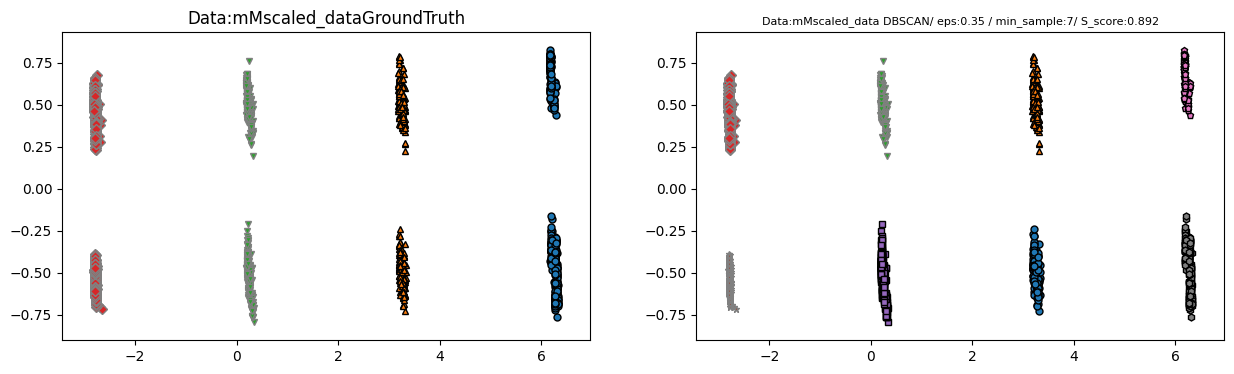

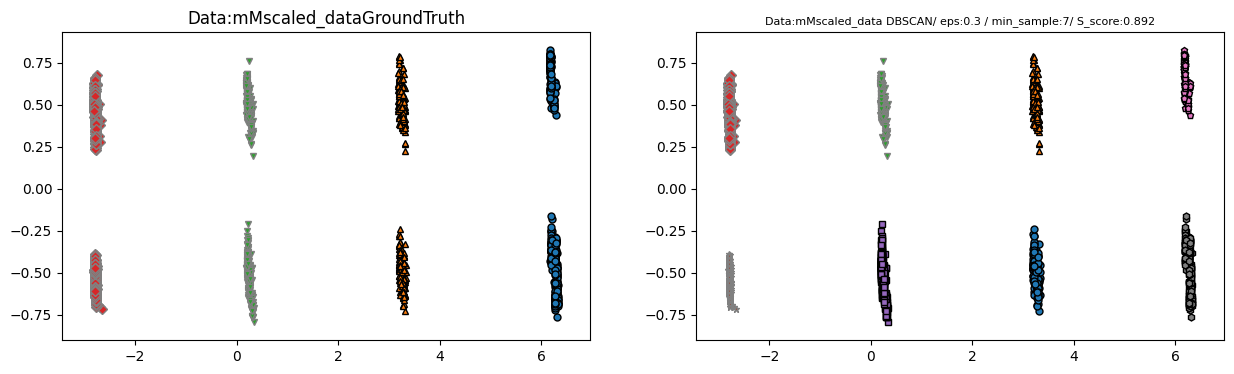

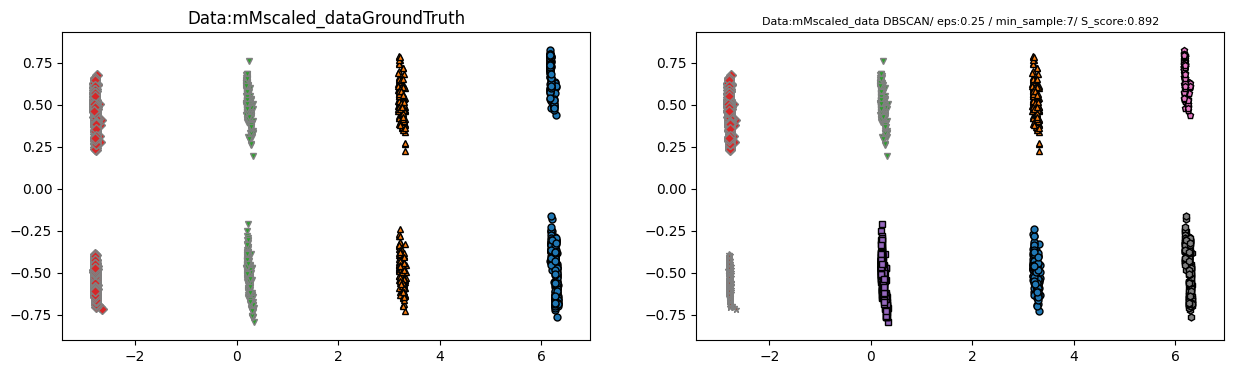

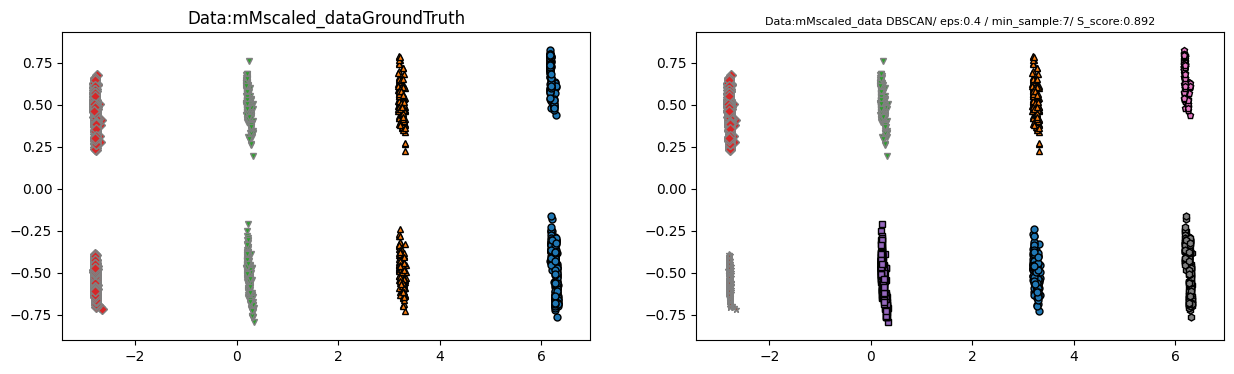

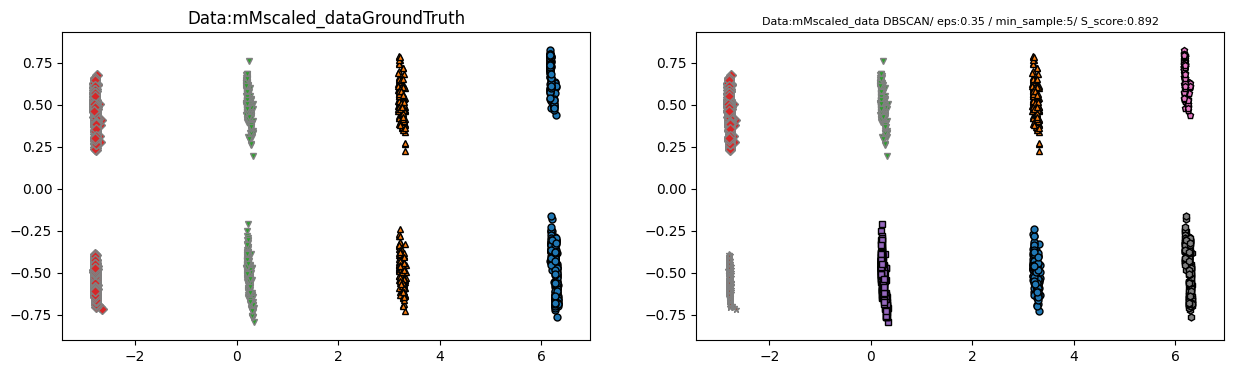

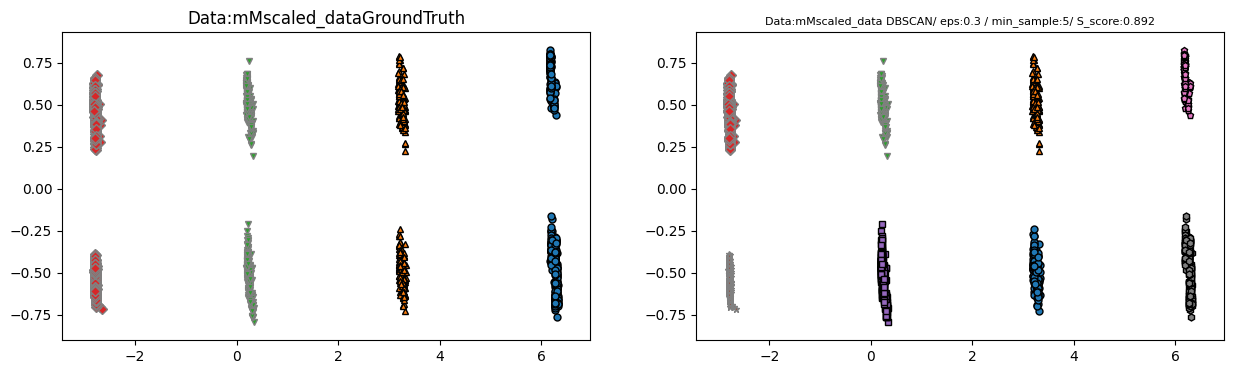

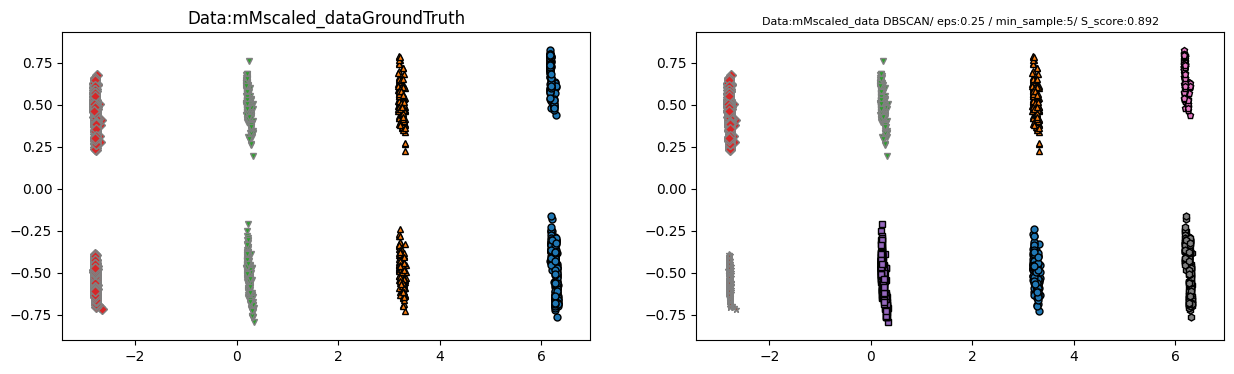

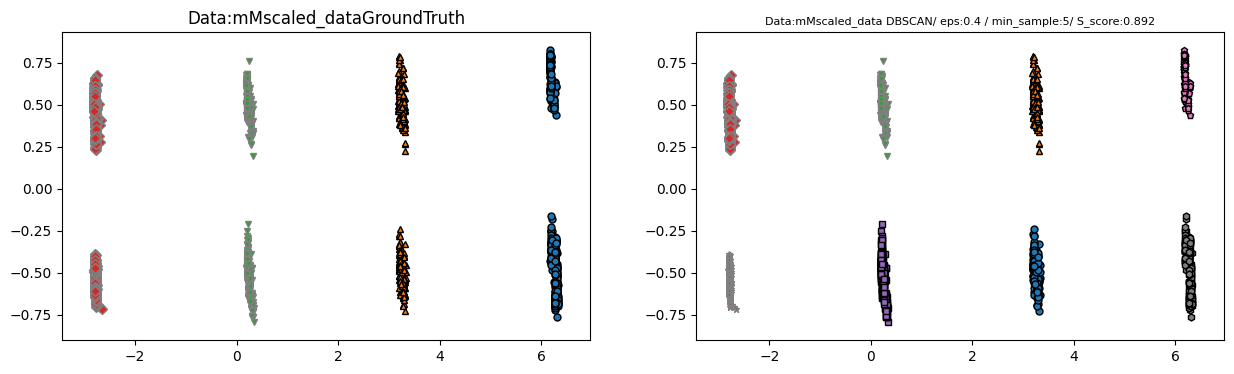

In [280]:
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data",min_samples=7,eps=0.35)
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data",min_samples=7,eps=0.30)
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data",min_samples=7,eps=0.25)
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data",min_samples=7,eps=0.40)
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data",min_samples=5,eps=0.35)
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data",min_samples=5,eps=0.30)
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data",min_samples=5,eps=0.25)
DBSCAN_Plot(Data=mMscaled_data,NAME="mMscaled_data",min_samples=5,eps=0.40)

In [285]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def find_best_hyperparams(data):
    best_score = -1
    best_min_samples = None
    best_eps = None
    
    for min_samples in range(2, 11):
        for eps in np.arange(0.1, 1.1, 0.1):
            dbscan = DBSCAN(min_samples=min_samples, eps=eps)
            results = dbscan.fit_predict(data)
            score = silhouette_score(data, results)
            
            if score > best_score:
                best_score = score
                best_min_samples = min_samples
                best_eps = eps
    
    print(f"Best min_samples: {best_min_samples}")
    print(f"Best eps: {best_eps}")
    print(f"Best silhouette score: {best_score}")
    print()

In [286]:
find_best_hyperparams(sdscaled_data)
find_best_hyperparams(mMscaled_data)
find_best_hyperparams(robust_data)

Best min_samples: 2
Best eps: 0.9
Best silhouette score: 0.5090271731328735

Best min_samples: 2
Best eps: 0.1
Best silhouette score: 0.8922500693248072

Best min_samples: 8
Best eps: 0.4
Best silhouette score: 0.6136736886631924



# DBSCAN 튜닝

In [288]:
# sdscaled_data에서 X와 Class 추출
X = sdscaled_data[['X', 'Y']].values
labels_true = sdscaled_data['Class'].values

Hyperparameters: [ e: 0.03 , n: 10 ]
V-measure: 0.019
Silhouette score: -0.197


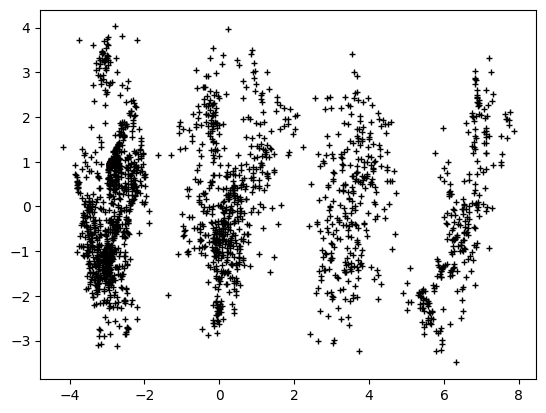

Hyperparameters: [ e: 0.06 , n: 10 ]
V-measure: 0.102
Silhouette score: -0.194


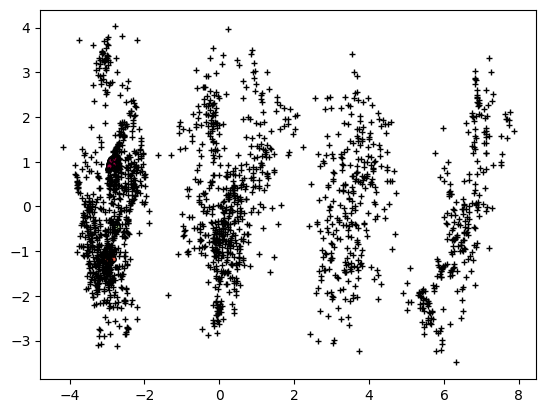

Hyperparameters: [ e: 0.09 , n: 10 ]
V-measure: 0.176
Silhouette score: -0.336


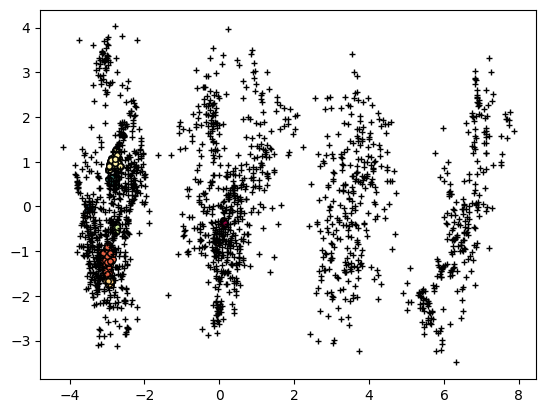

Hyperparameters: [ e: 0.12 , n: 10 ]
V-measure: 0.280
Silhouette score: -0.265


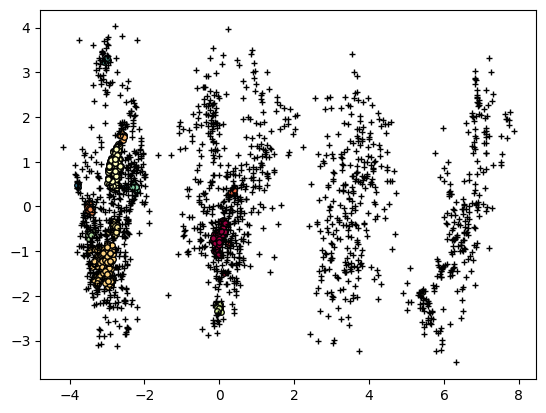

Hyperparameters: [ e: 0.15 , n: 10 ]
V-measure: 0.407
Silhouette score: -0.111


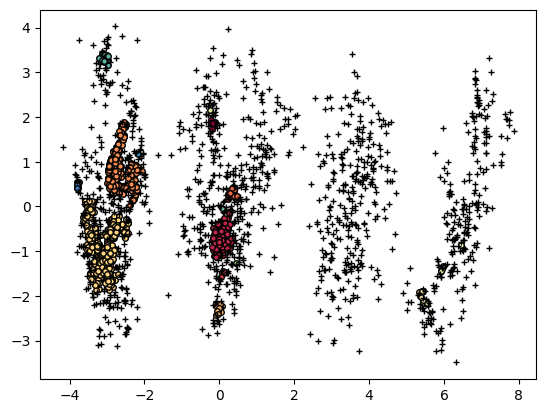

Hyperparameters: [ e: 0.18 , n: 10 ]
V-measure: 0.520
Silhouette score: -0.197


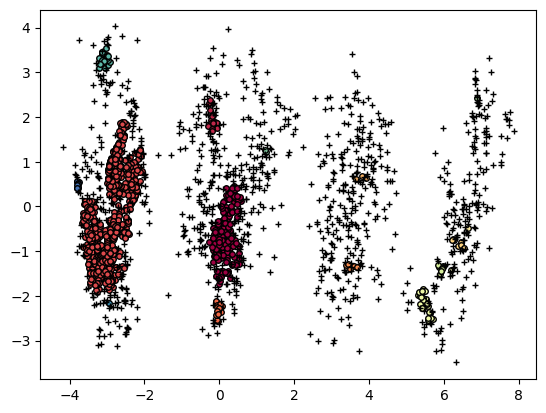

Hyperparameters: [ e: 0.21 , n: 10 ]
V-measure: 0.572
Silhouette score: -0.070


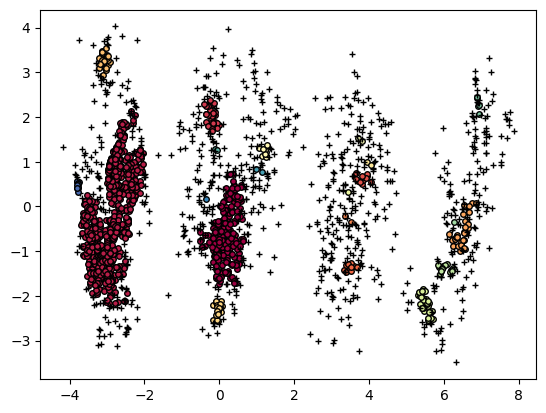

Hyperparameters: [ e: 0.24 , n: 10 ]
V-measure: 0.642
Silhouette score: 0.244


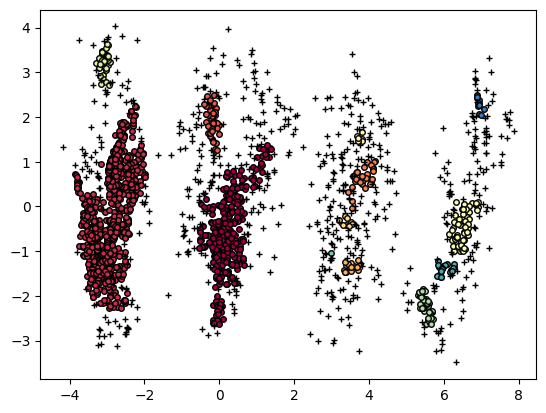

Hyperparameters: [ e: 0.27 , n: 10 ]
V-measure: 0.678
Silhouette score: 0.191


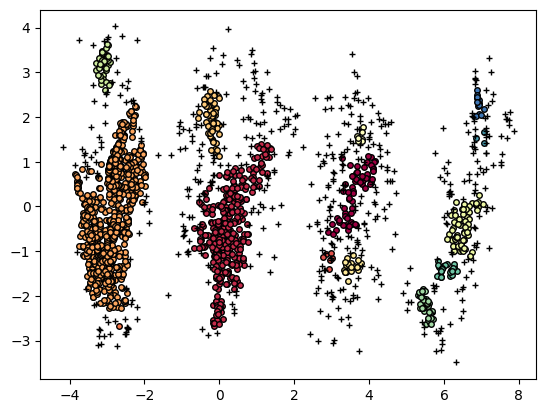

Hyperparameters: [ e: 0.3 , n: 10 ]
V-measure: 0.768
Silhouette score: 0.288


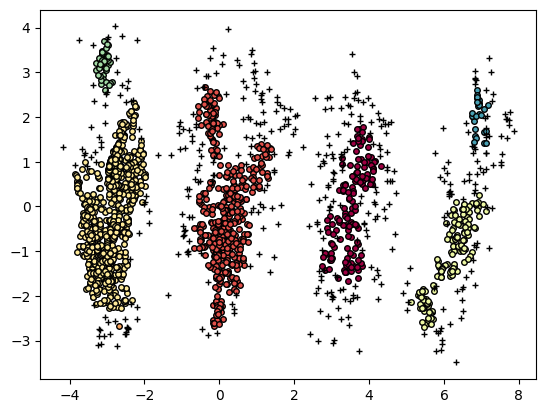

Hyperparameters: [ e: 0.33 , n: 10 ]
V-measure: 0.807
Silhouette score: 0.328


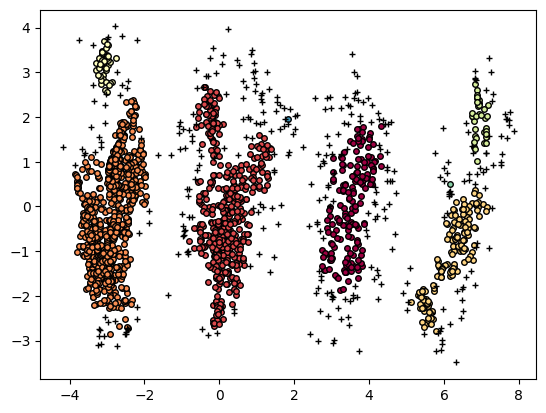

Hyperparameters: [ e: 0.36 , n: 10 ]
V-measure: 0.823
Silhouette score: 0.353


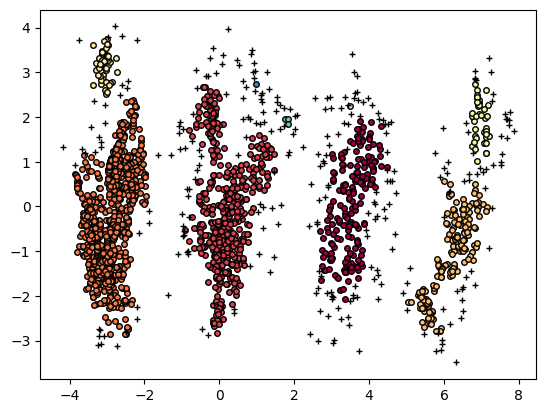

Hyperparameters: [ e: 0.39 , n: 10 ]
V-measure: 0.904
Silhouette score: 0.394


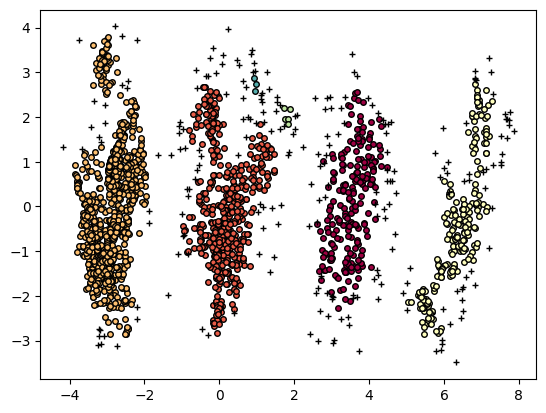

Hyperparameters: [ e: 0.42 , n: 10 ]
V-measure: 0.938
Silhouette score: 0.424


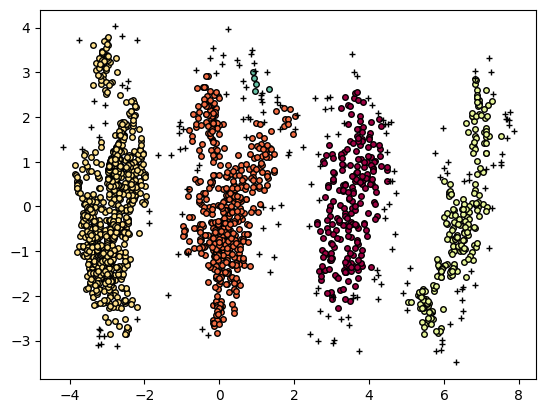

Hyperparameters: [ e: 0.45 , n: 10 ]
V-measure: 0.957
Silhouette score: 0.480


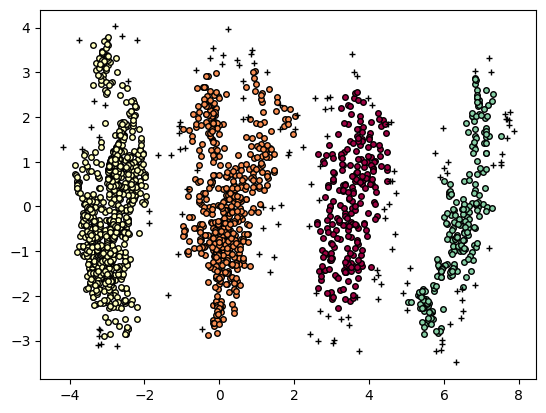

Hyperparameters: [ e: 0.48 , n: 10 ]
V-measure: 0.965
Silhouette score: 0.482


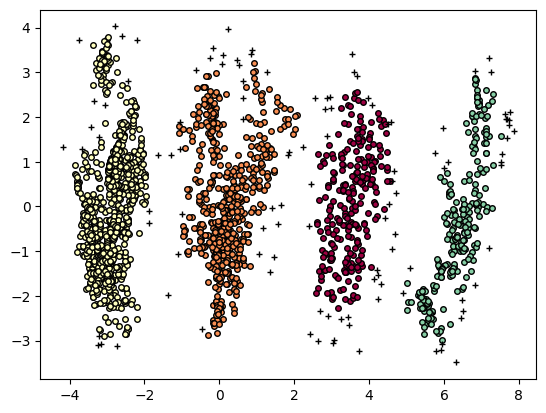

Hyperparameters: [ e: 0.51 , n: 10 ]
V-measure: 0.971
Silhouette score: 0.484


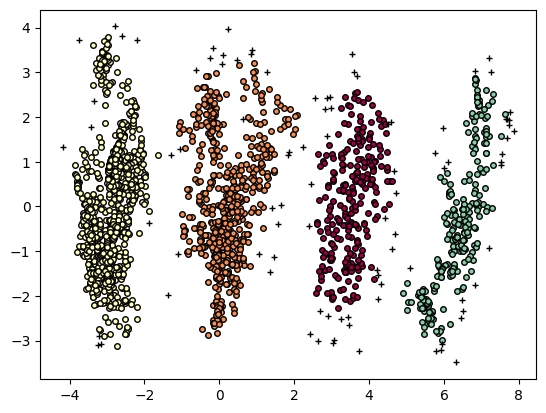

Hyperparameters: [ e: 0.54 , n: 10 ]
V-measure: 0.977
Silhouette score: 0.485


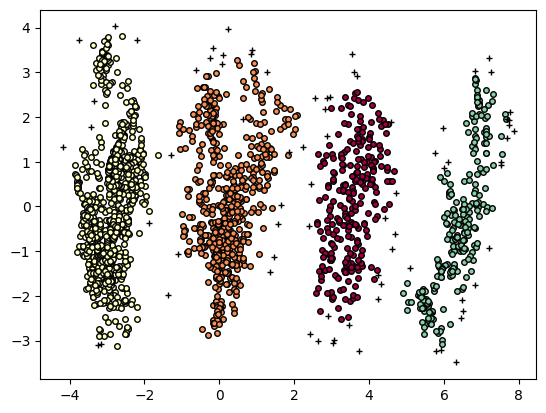

Hyperparameters: [ e: 0.57 , n: 10 ]
V-measure: 0.982
Silhouette score: 0.485


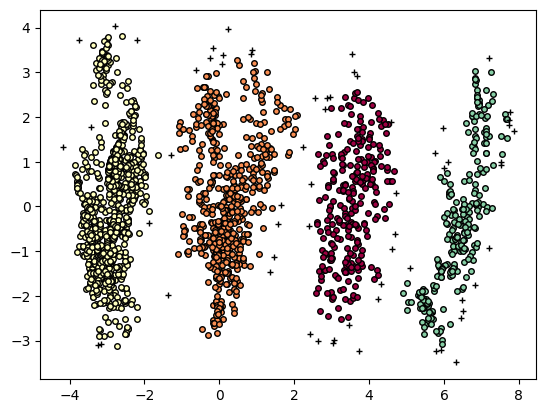

In [290]:
# DBSCAN 하이퍼 파라미터 튜닝
for i in range(1, 20):
    epsilon = round(i * 0.03, 2)
    no_of_sample = 10
    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")
    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_
        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
    except:
        pass
        
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

In [291]:
# sdscaled_data에서 X와 Class 추출
X = mMscaled_data[['X', 'Y']].values
labels_true = mMscaled_data['Class'].values

Hyperparameters: [ e: 0.6 , n: 10 ]
V-measure: 0.859
Silhouette score: 0.864


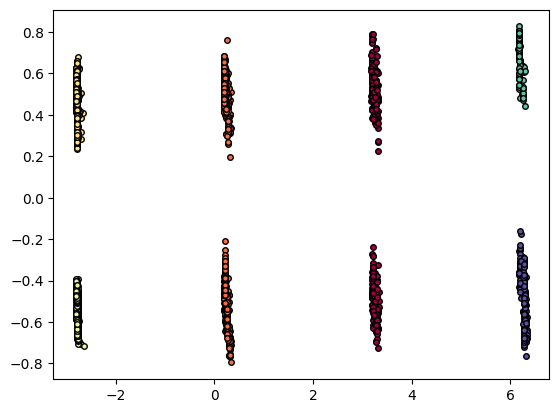

Hyperparameters: [ e: 0.63 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


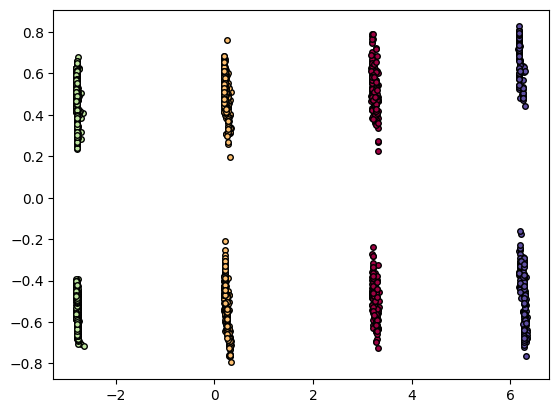

Hyperparameters: [ e: 0.66 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


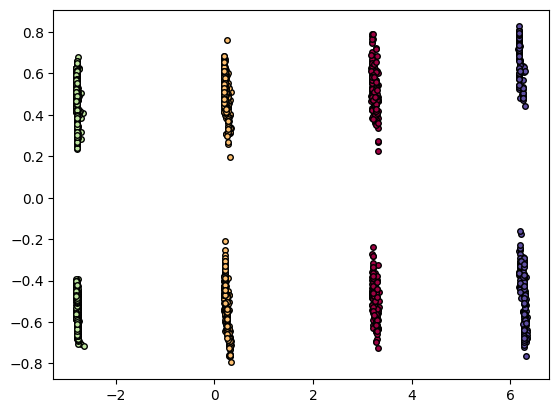

Hyperparameters: [ e: 0.69 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


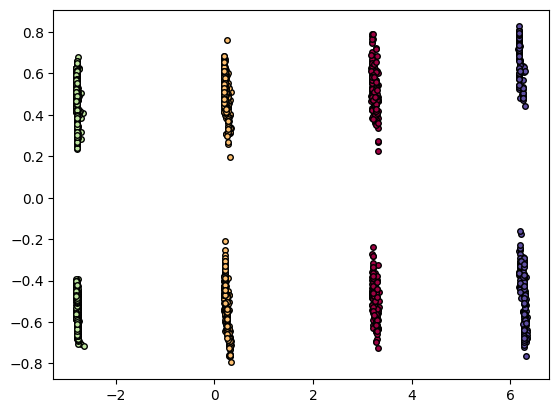

Hyperparameters: [ e: 0.72 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


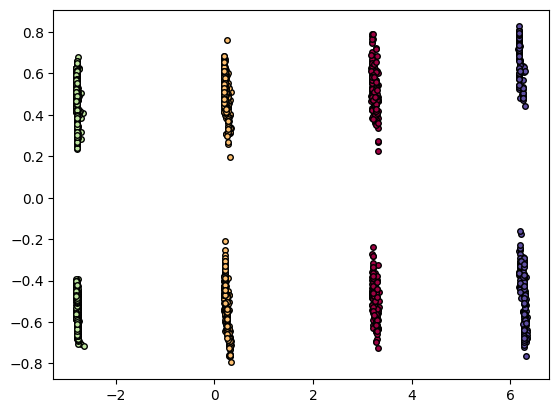

Hyperparameters: [ e: 0.75 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


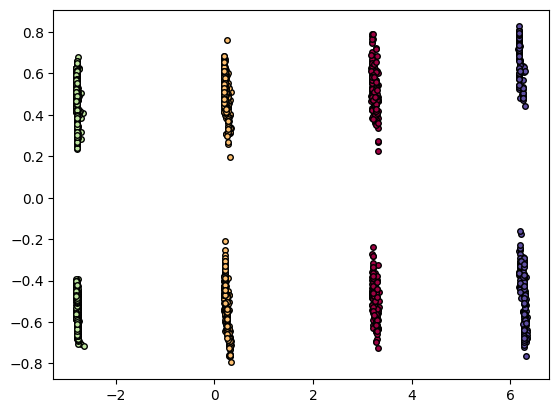

Hyperparameters: [ e: 0.78 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


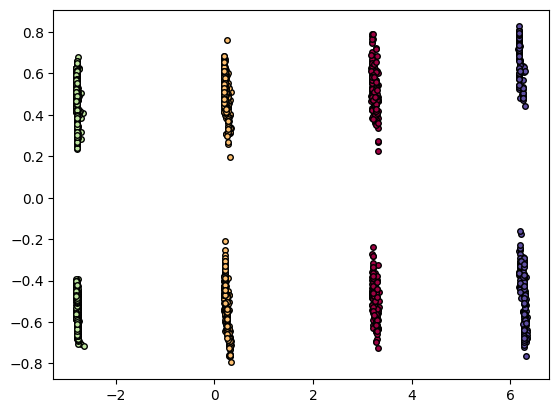

Hyperparameters: [ e: 0.81 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


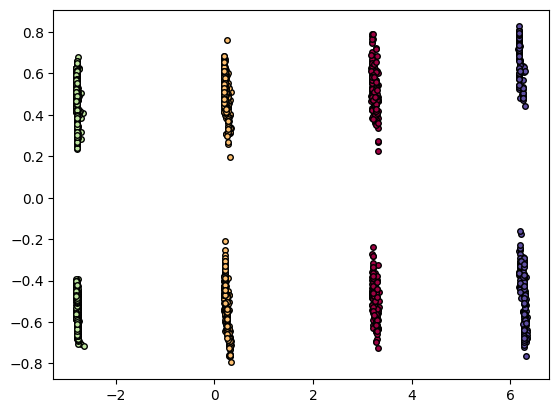

Hyperparameters: [ e: 0.84 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


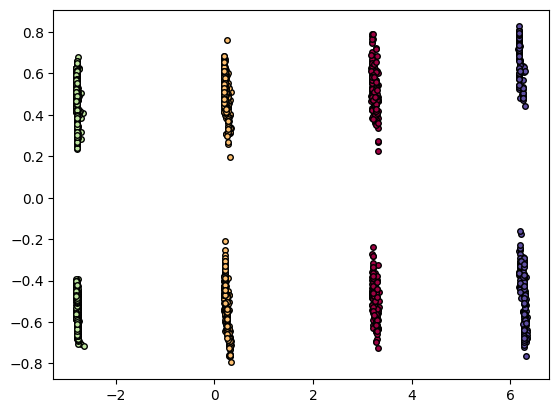

Hyperparameters: [ e: 0.87 , n: 10 ]
V-measure: 1.000
Silhouette score: 0.814


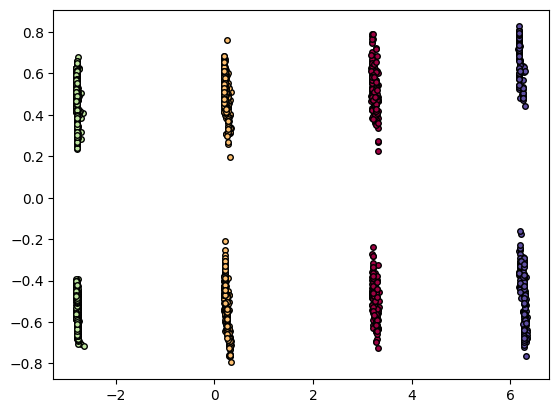

In [293]:
# DBSCAN 하이퍼 파라미터 튜닝
for i in range(20, 30):
    epsilon = round(i * 0.03, 2)
    no_of_sample = 10
    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")
    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_
        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
    except:
        pass
        
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

# 의사결정트리

In [52]:
seed = 2023
x_train, x_test, y_train, y_test = train_test_split(data, data_label, test_size=0.7, random_state=seed)

In [53]:
dt_clf = DecisionTreeClassifier(random_state=seed)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(random_state=2023)

In [54]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = ['0','1','2','3'], feature_names = list(data.columns), impurity=True, filled=True)

In [55]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render(filename='tree', format='png', view=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


'tree.png'

In [56]:
y_pred = dt_clf.predict(x_test)

In [57]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average='macro')
precision = mt.precision_score(y_test, y_pred, average='macro')
f1_score = mt.f1_score(y_test, y_pred, average='macro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')        # 맞춘거
print('Precision: ', format(precision,'.2f'),'\n')  # 예측
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9390828199863107 

Accuracy:  0.94 

Recall:  0.91 

Precision:  0.92 

F1_score:  0.91 

Confusion Matrix: 
 [[183  19   1   0]
 [ 13 160  20   0]
 [  0  11 359  17]
 [  0   1   7 670]]


# 교차검증

In [58]:
# 교차검증

x = data
y = data_label

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9439698002363658


In [59]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

fit_time  score_time  test_score
0  0.009413    0.002942    0.854067
1  0.005200    0.001551    0.968900
2  0.005207    0.001528    0.961631
3  0.005289    0.001524    0.949640
4  0.005315    0.001588    0.985612

In [60]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9390828199863107

# 가지치기 수행

In [71]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=4, random_state=seed) # max_depth=3으로 제한
pruned_dt_clf.fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))

Accuracy of training set: 0.938
Accuracy of test set: 0.899


In [75]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = ['0','1','2','3'], feature_names = list(data.columns), impurity=True, filled=True)

In [74]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
# graph.render(filename='prunedtree', format='png', view=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]
